<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/main/EyCD_MEV_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## **Exploración y Curación de Datos**

**_GRUPO1_**

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Ormaechea, Sebastián

En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos

In [ ]:
import pandas as pd
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:00<00:00, 249MB/s]


In [ ]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt

import datetime

# Lectura de csv y obtención de dataframe 
#df_=pd.read_csv(r"C:\Users\Sebastian\Documents\buckup 20-4-2021\4- Data Science\Diplo FAMAF\Espacios verdes\espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
#df_

- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Creamos un nuevo dataframe con las columnas de interés 
df_interest_A1 = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_A1)

208932

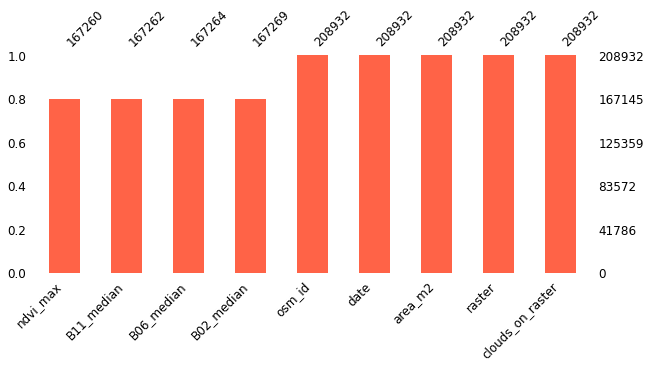

In [ ]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest_A1,figsize=(10, 4), sort="ascending",fontsize=12, color='tomato') 

- Desechar valores nulos

In [ ]:
# Desechamos valores nulos de las columnas de interés y generamos nuevo dataframe 
df_interest_A2=df_interest_A1.dropna(subset=["B02_median","B06_median","B11_median"])

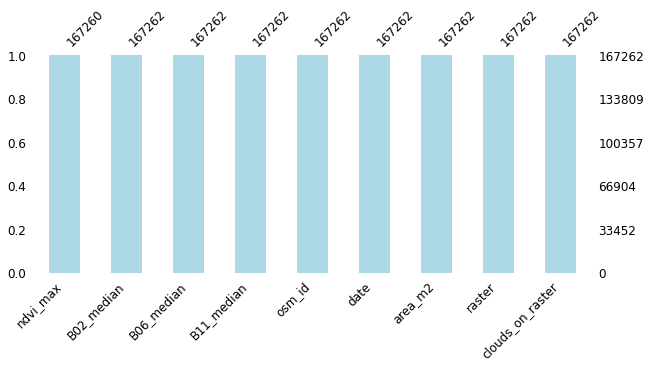

In [ ]:
# Graficamos nuevamente y observamos que ya no hay presentes valores nulos
msno.bar(df_interest_A2,figsize=(10, 4), sort="ascending",fontsize=12, color='lightblue') 

- Filtrar por nubosidad < 10%

In [ ]:
# Filtramos por nubosidad < 10% y creamos nuevo dataframe
print(df_interest_A1.clouds_on_raster.value_counts())

df_interest_A3=df_interest_A2[df_interest_A2['clouds_on_raster']<10]
len(df_interest_A3)

0.000000      112036
100.000000     10598
0.949876         757
71.800745        757
98.263644        757
               ...  
7.396293         757
1.664029         757
28.489752        757
36.671820        757
30.789672        757
Name: clouds_on_raster, Length: 116, dtype: int64


137330

- Remocion de Outliers (a nivel general sin considerar estacionalidad)

Para remover outliers, primero definimos una función que genere nuevas columnas que diferencien outliers (valor=1), del resto de los registros (valor=0).
Luego, para la eliminación de outliers, aplicamos el criterio de quitar aquellos registros donde se observa que para las tres bandas bajo análisis (columnas), los valores son outliers (valor=1).  

In [ ]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [ ]:
bandas = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max']
find_outliers(df_interest_A3, bandas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df_interest_A3

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,outl_B02_median,outl_B06_median,outl_B11_median,outl_ndvi_max
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,0,0,0
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0,0,0
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0,0,0
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0,0
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0,0
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0,0
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0,0
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0,0


In [ ]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_A4 = df_interest_A3[~((df_interest_A3['outl_B02_median']==1) & (df_interest_A3['outl_B06_median']==1) & (df_interest_A3['outl_B11_median']==1))]
len(df_interest_A4)

133285

- Grabar los datos transformados

In [ ]:
df_interest_A4.to_csv("df_interest_A4_G1.csv", index=None)

### Receta [B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_B1 = df_interest_A1.copy()
len(df_interest_B1)

208932

- Remoción de Outliers (a nivel general sin considerar estacionalidad)

In [ ]:
# Aplicamos la función desarrollada anteriormente
find_outliers(df_interest_B1, bandas)
# Removemos outliers
df_interest_B2 = df_interest_B1[~((df_interest_B1['outl_B02_median']==1) & (df_interest_B1['outl_B06_median']==1) & (df_interest_B1['outl_B11_median']==1)
& (df_interest_B1['outl_ndvi_max']==1))]
len(df_interest_B2)

205008

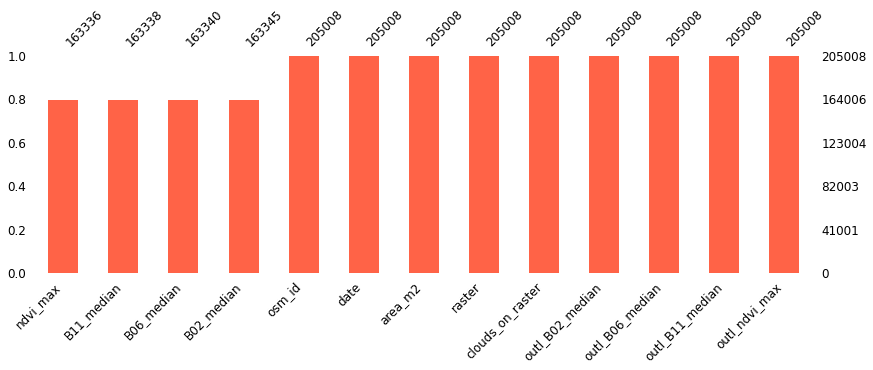

In [ ]:
# Analizamos si hay valores nulos con la siguiente gráfica
msno.bar(df_interest_B2,figsize=(14, 4), sort="ascending",fontsize=12, color='tomato')

- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

La elección del método de imputación, requiere del conocimiento de la naturaleza del problema de los datos que faltan en el dataset a imputar. Como vimos en el práctico pasado, es posible que la falta de registros en este dataset sea debido a un error no aleatorio correspondiente a características no observadas. Esto acota la disponibilidad de métodos de imputación. Podríamos considerar el uso de técnicas como KNN (vecino más cercano). Sin embargo, para la imputación de valores faltantes en una variable dada, KNN define con mayor precisión los vecinos cercanos si se utilizan variables de soporte que contengan datos para el mismo registro donde faltan datos en la variable dada. En el caso de este dataset, lamentablemente, los registros que faltan para una variable, son los mismos que para las otras, impidiendo una estimación adecuada por KNN. Esto puede verse claramente en la siguiente gráfica.   

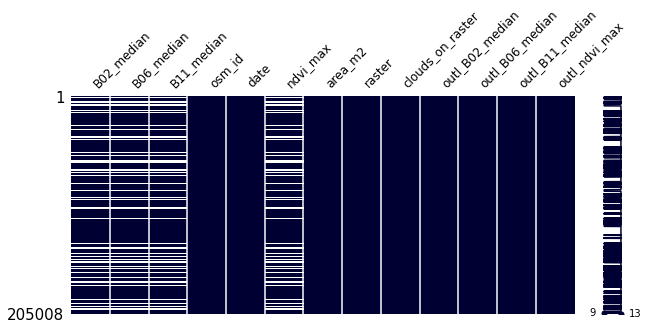

In [ ]:
msno.matrix(df_interest_B2,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

Por otra parte, dado que los datos corresponden a una serie temporal, podemos considerar el uso de métodos como Forward fill, Back fill e Interpolación lineal. Para ello, verificamos primero que los valores faltantes no estén agrupados en el mismo período temporal, ya que generaría una pobre estimación de valores faltantes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


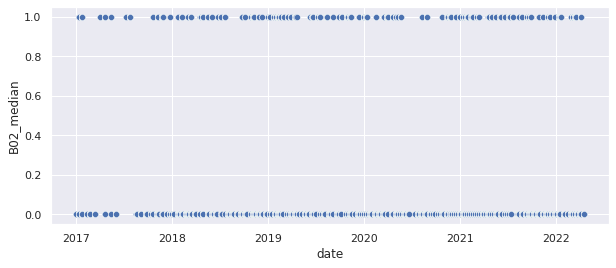

In [ ]:
import seaborn as sns
df_interest_B2['date']= pd.to_datetime(df_interest_B2['date'])
sns.set(rc = {'figure.figsize':(10,4)})
sns.scatterplot(x=df_interest_B2["date"], y=df_interest_B2["B02_median"].isnull())

Los valores faltantes se ubican a lo largo de toda la serie temporal, por lo que podemos utilizar Forward fill, Back fill o Interpolación lineal. Podríamos seleccionar cualquiera ya que no tenemos elementos de juicio para definir cual de los tres podría tener mejor performance sobre este dataset. Sin embargo, una opción interesante es combinar Forward fill y Back fill.

205008


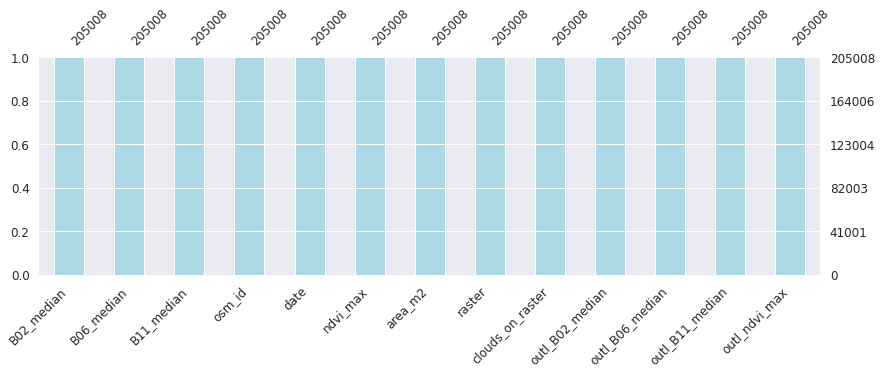

In [ ]:
# Imputamos valores nulos bajo Forward fill y Backward fill combinados
df_interest_B3 = df_interest_B2.copy()

df_interest_B3 = df_interest_B3.fillna(method='ffill').fillna(method='bfill')
print(len(df_interest_B3))
msno.bar(df_interest_B3,figsize=(14, 4), sort="ascending",fontsize=12, color='lightblue')

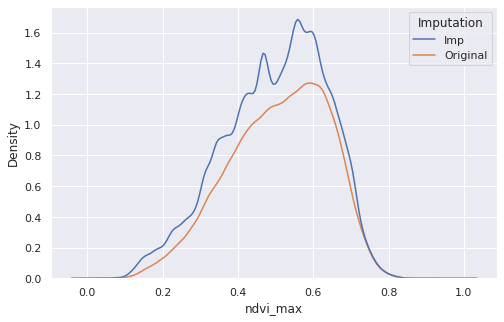

In [ ]:
df_imp_ndvi_ = df_interest_B3.ndvi_max.to_frame()
df_imp_ndvi_['Imputation'] = 'Imp'
df_ndvi_ = df_interest_B2.ndvi_max.dropna().to_frame()
df_ndvi_['Imputation'] = 'Original'
data_ = pd.concat([df_imp_ndvi_, df_ndvi_], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data_, x='ndvi_max', hue='Imputation')

- Filtrar por nubosidad < 10%

In [ ]:
# Filtrar por nubosidad < 10%
df_interest_B4=df_interest_B3[df_interest_B3['clouds_on_raster']<10]
len(df_interest_B4)

138213

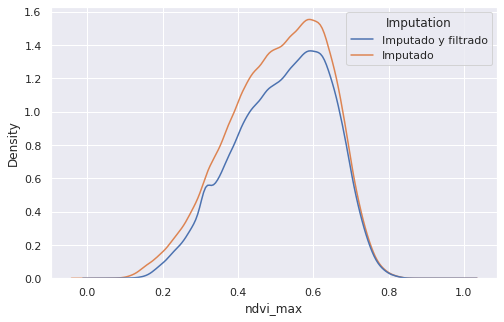

In [ ]:
df_imp_ndvi_4 = df_interest_B4.ndvi_max.to_frame()
df_imp_ndvi_4['Imputation'] = 'Imputado y filtrado'
df_ndvi_4 = df_interest_B2.ndvi_max.dropna().to_frame()
df_ndvi_4['Imputation'] = 'Imputado'
data_4 = pd.concat([df_imp_ndvi_4, df_ndvi_4], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
h = sns.kdeplot(data=data_4, x='ndvi_max', hue='Imputation')

- Grabar los datos transformados

In [ ]:
df_interest_B4.to_csv("df_interest_B4_G1.csv", index=None)

### Receta [C-1] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_C1 = df_interest_A1.copy()
len(df_interest_C1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [ ]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_C1['date']= pd.to_datetime(df_interest_C1['date'])

# Extraemos el mes de cada registro.
df_interest_C1['month'] = df_interest_C1['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_C1, "month")
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [ ]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B02_summer'] = df_interest_C1['B02_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B02_autumn'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B02_winter'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B02_spring'] = df_interest_C1['B02_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B06_summer'] = df_interest_C1['B06_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B06_autumn'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B06_winter'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B06_spring'] = df_interest_C1['B06_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B11_summer'] = df_interest_C1['B11_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B11_autumn'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B11_winter'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B11_spring'] = df_interest_C1['B11_median']

In [ ]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

# Aplicamos la función de detección de outliers
find_outliers(df_interest_C1, Season_values)

In [ ]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_C2_summer = df_interest_C1[~((df_interest_C1['outl_B02_summer']==1) & (df_interest_C1['outl_B06_summer']==1) & 
                        (df_interest_C1['outl_B11_summer']==1))]
print(len(df_interest_C2_summer))

df_interest_C2_autumn = df_interest_C2_summer[~((df_interest_C2_summer['outl_B02_autumn']==1) & 
                        (df_interest_C2_summer['outl_B06_autumn']==1) & (df_interest_C2_summer['outl_B11_autumn']==1))]
print(len(df_interest_C2_autumn))

df_interest_C2_winter = df_interest_C2_autumn[~((df_interest_C2_autumn['outl_B02_winter']==1) &  
                        (df_interest_C2_autumn['outl_B06_winter']==1) & (df_interest_C2_autumn['outl_B11_winter']==1))]
print(len(df_interest_C2_winter))

df_interest_C2_spring = df_interest_C2_winter[~((df_interest_C2_winter['outl_B02_spring']==1) & 
                        (df_interest_C2_winter['outl_B06_spring']==1) & (df_interest_C2_winter['outl_B11_spring']==1))]
print(len(df_interest_C2_spring))

205669
202722
200130
197680


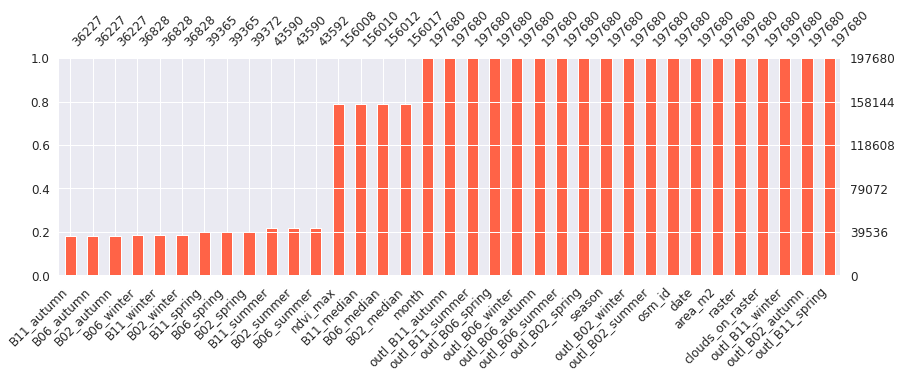

In [ ]:
msno.bar(df_interest_C2_spring,figsize=(14, 4), sort="ascending",fontsize=12, color='tomato')

- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)

In [ ]:
df_interest_summerC = df_interest_C2_spring[df_interest_C2_spring['season']=="summer"]
df_interest_autumnC = df_interest_C2_spring[df_interest_C2_spring['season']=="autumn"]
df_interest_winterC = df_interest_C2_spring[df_interest_C2_spring['season']=="winter"]
df_interest_springC = df_interest_C2_spring[df_interest_C2_spring['season']=="spring"]

In [ ]:
# Dividimos el conjunto de datos por estación
df_interest_summer = df_interest_C2_spring[df_interest_C2_spring['season']=="summer"]
df_interest_autumn = df_interest_C2_spring[df_interest_C2_spring['season']=="autumn"]
df_interest_winter = df_interest_C2_spring[df_interest_C2_spring['season']=="winter"]
df_interest_spring = df_interest_C2_spring[df_interest_C2_spring['season']=="spring"]

In [ ]:
# Imputamos valores nulos a nivel estacional bajo Forward fill y Backward fill combinados
vars_imput = ["B02_median","B06_median","B11_median", "ndvi_max"]

df_interest_summer[vars_imput]=df_interest_summer[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_autumn[vars_imput]=df_interest_autumn[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_winter[vars_imput]=df_interest_winter[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_spring[vars_imput]=df_interest_spring[vars_imput].fillna(method='ffill').fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# Creamos la data específica para las gráficas
df_imp_ndvi_summerC = df_interest_summer.ndvi_max.to_frame()
df_imp_ndvi_summerC['Imputation'] = 'Datos Imputados'
df_ndvi_summerC= df_interest_summerC.ndvi_max.dropna().to_frame()
df_ndvi_summerC['Imputation'] = 'Original'
data_verC = pd.concat([df_imp_ndvi_summerC, df_ndvi_summerC], ignore_index=True)

df_imp_ndvi_autumnC = df_interest_autumn.ndvi_max.to_frame()
df_imp_ndvi_autumnC['Imputation'] = 'Datos Imputados'
df_ndvi_autumnC = df_interest_autumnC.ndvi_max.dropna().to_frame()
df_ndvi_autumnC['Imputation'] = 'Original'
data_otC = pd.concat([df_imp_ndvi_autumnC, df_ndvi_autumnC], ignore_index=True)

df_imp_ndvi_winterC = df_interest_winter.ndvi_max.to_frame()
df_imp_ndvi_winterC['Imputation'] = 'Datos Imputados'
df_ndvi_winterC = df_interest_winterC.ndvi_max.dropna().to_frame()
df_ndvi_winterC['Imputation'] = 'Original'
data_invC = pd.concat([df_imp_ndvi_winterC, df_ndvi_winterC], ignore_index=True)

df_imp_ndvi_springC = df_interest_spring.ndvi_max.to_frame()
df_imp_ndvi_springC['Imputation'] = 'Datos Imputados'
df_ndvi_springC = df_interest_springC.ndvi_max.dropna().to_frame()
df_ndvi_springC['Imputation'] = 'Original'
data_priC = pd.concat([df_imp_ndvi_springC, df_ndvi_springC], ignore_index=True)

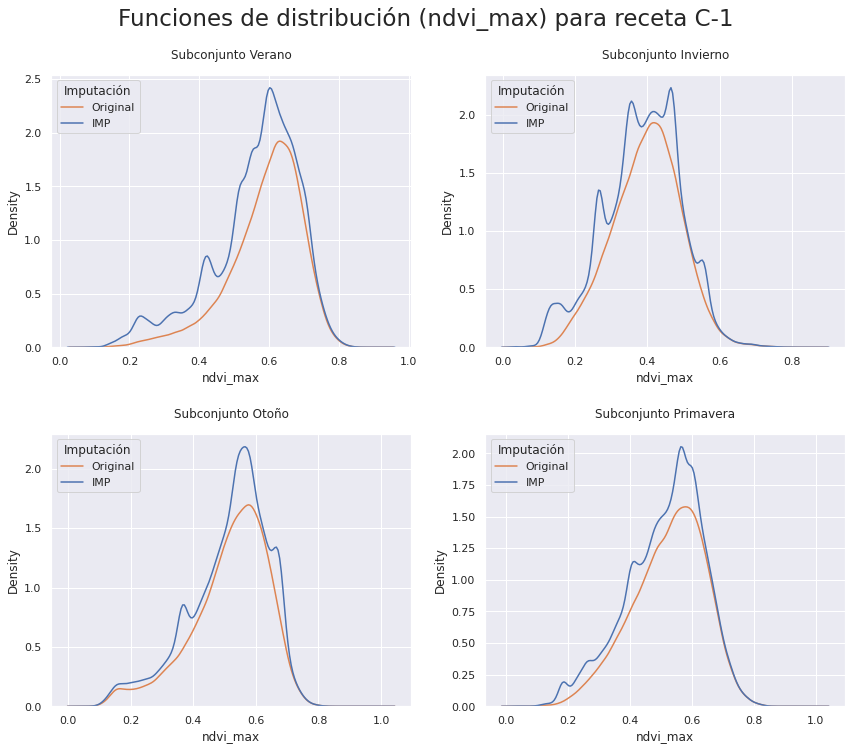

In [ ]:
# Creamos las gráficas en un plot múltiple
plt.figure(figsize=(12,10))
plt.suptitle('Funciones de distribución (ndvi_max) para receta C-1', x=0.5, y=1.04, fontsize=23)

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_verC, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Verano', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_invC, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_otC, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Otoño', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_priC, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Primavera', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP']);

197680


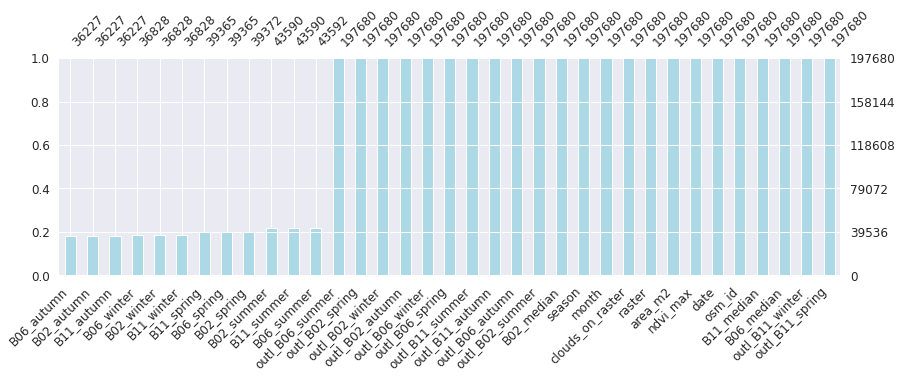

In [ ]:
# Volvemos a unir los subconjuntos estacionales en un mismo dataframe
df_interest_C2 = pd.concat([df_interest_summer, df_interest_autumn, df_interest_winter, df_interest_spring], ignore_index=True)
print(len(df_interest_C2))
msno.bar(df_interest_C2,figsize=(14, 4), sort="ascending",fontsize=12, color='lightblue');

- Filtrar por nubosidad:
    - < 20%
    - < 40%

In [ ]:
# Filtramos por nubosidad < 20% y luego < 40%
df_interest_C3 = df_interest_C2[df_interest_C2['clouds_on_raster']<20]
print(len(df_interest_C3))
df_interest_C4 = df_interest_C2[df_interest_C2['clouds_on_raster']<40]
print(len(df_interest_C4))


145870
160730


- Grabar los datos transformados

In [ ]:
df_interest_C3.to_csv("df_interest_C3_G1.csv", index=None)
df_interest_C4.to_csv("df_interest_C4_G1.csv", index=None)

### Receta [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_D1 = df_interest_A1.copy()
len(df_interest_D1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [ ]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_D1['date']= pd.to_datetime(df_interest_D1['date'])

# Extraemos el mes de cada registro.
df_interest_D1['month'] = df_interest_D1['date'].dt.month

# Aplicamos la función (seasons)creada anteriormente para determinar la estación a la que corresponde cada registro.
seasons(df_interest_D1, "month")

# Generamos nuevas columnas de cada banda para cada estación
df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B02_summer'] = df_interest_D1['B02_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B02_autumn'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B02_winter'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B02_spring'] = df_interest_D1['B02_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B06_summer'] = df_interest_D1['B06_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B06_autumn'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B06_winter'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B06_spring'] = df_interest_D1['B06_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B11_summer'] = df_interest_D1['B11_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B11_autumn'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B11_winter'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B11_spring'] = df_interest_D1['B11_median']

# Aplicamos la función de detección de outliers utilizando la lista ya creada de columnas de interés (Season_values)
find_outliers(df_interest_D1, Season_values)

# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_D2_summer = df_interest_D1[~((df_interest_D1['outl_B02_summer']==1) & (df_interest_D1['outl_B06_summer']==1) & 
                        (df_interest_D1['outl_B11_summer']==1))]
print(len(df_interest_D2_summer))

df_interest_D2_autumn = df_interest_D2_summer[~((df_interest_D2_summer['outl_B02_autumn']==1) & 
                        (df_interest_D2_summer['outl_B06_autumn']==1) & (df_interest_D2_summer['outl_B11_autumn']==1))]
print(len(df_interest_D2_autumn))

df_interest_D2_winter = df_interest_D2_autumn[~((df_interest_D2_autumn['outl_B02_winter']==1) & 
                        (df_interest_D2_autumn['outl_B06_winter']==1) & (df_interest_D2_autumn['outl_B11_winter']==1))]
print(len(df_interest_D2_winter))

df_interest_D2_spring = df_interest_D2_winter[~((df_interest_D2_winter['outl_B02_spring']==1) & 
                        (df_interest_D2_winter['outl_B06_spring']==1) & (df_interest_D2_winter['outl_B11_spring']==1))]
print(len(df_interest_D2_spring))

205669
202722
200130
197680


- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

In [ ]:
df_interest_summerX = df_interest_D2_spring[df_interest_D2_spring['season']=="summer"]
df_interest_autumnX = df_interest_D2_spring[df_interest_D2_spring['season']=="autumn"]
df_interest_winterX = df_interest_D2_spring[df_interest_D2_spring['season']=="winter"]
df_interest_springX = df_interest_D2_spring[df_interest_D2_spring['season']=="spring"]

In [ ]:
# Dividimos el conjunto de datos por estación
df_interest_summer = df_interest_D2_spring[df_interest_D2_spring['season']=="summer"]
df_interest_autumn = df_interest_D2_spring[df_interest_D2_spring['season']=="autumn"]
df_interest_winter = df_interest_D2_spring[df_interest_D2_spring['season']=="winter"]
df_interest_spring = df_interest_D2_spring[df_interest_D2_spring['season']=="spring"]

In [ ]:
# Imputamos valores nulos a nivel estacional bajo Forward fill y Backward fill combinados
vars_imput = ["B02_median","B06_median","B11_median", "ndvi_max"]

df_interest_summer[vars_imput]=df_interest_summer[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_autumn[vars_imput]=df_interest_autumn[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_winter[vars_imput]=df_interest_winter[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_spring[vars_imput]=df_interest_spring[vars_imput].fillna(method='ffill').fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# Creamos la data específica para las gráficas
df_imp_ndvi_summer_D = df_interest_summer.ndvi_max.to_frame()
df_imp_ndvi_summer_D['Imputation'] = 'IMP'
df_ndvi_summer_D = df_interest_summerX.ndvi_max.dropna().to_frame()
df_ndvi_summer_D['Imputation'] = 'Original'
data_ver_D = pd.concat([df_imp_ndvi_summer_D, df_ndvi_summer_D], ignore_index=True)

df_imp_ndvi_autumn_D = df_interest_autumn.ndvi_max.to_frame()
df_imp_ndvi_autumn_D['Imputation'] = 'IMP'
df_ndvi_autumn_D = df_interest_autumnX.ndvi_max.dropna().to_frame()
df_ndvi_autumn_D['Imputation'] = 'Original'
data_ot_D = pd.concat([df_imp_ndvi_autumn_D, df_ndvi_autumn_D], ignore_index=True)

df_imp_ndvi_winter_D = df_interest_winter.ndvi_max.to_frame()
df_imp_ndvi_winter_D['Imputation'] = 'IMP'
df_ndvi_winter_D = df_interest_winterX.ndvi_max.dropna().to_frame()
df_ndvi_winter_D['Imputation'] = 'Original'
data_inv_D = pd.concat([df_imp_ndvi_winter_D, df_ndvi_winter_D], ignore_index=True)

df_imp_ndvi_spring_D = df_interest_spring.ndvi_max.to_frame()
df_imp_ndvi_spring_D['Imputation'] = 'IMP'
df_ndvi_spring_D = df_interest_springX.ndvi_max.dropna().to_frame()
df_ndvi_spring_D['Imputation'] = 'Original'
data_pri_D = pd.concat([df_imp_ndvi_spring_D, df_ndvi_spring_D], ignore_index=True)

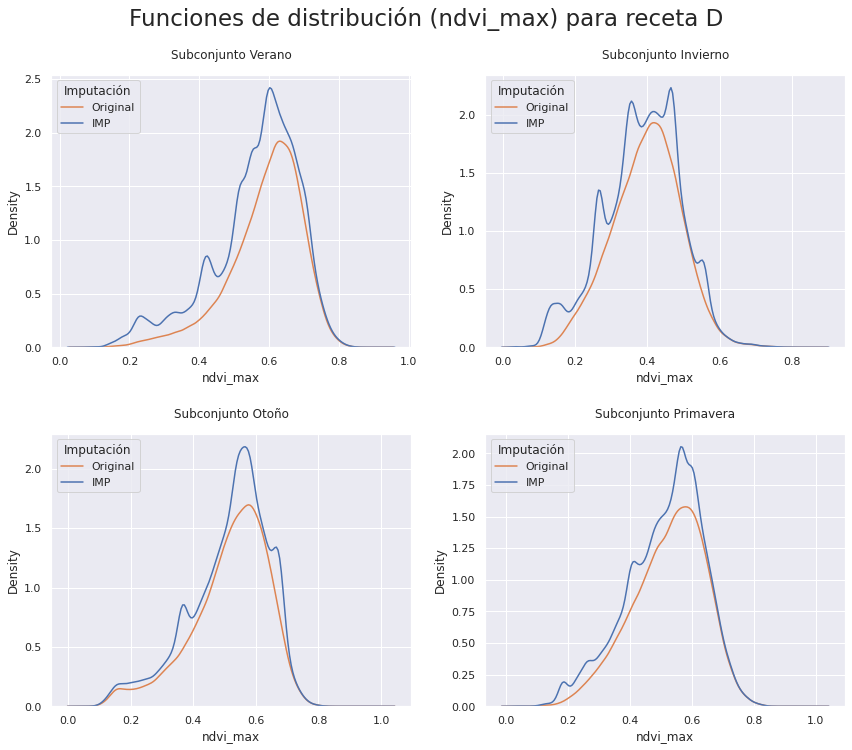

In [ ]:
# Creamos las gráficas en un plot múltiple
plt.figure(figsize=(12,10))
plt.suptitle('Funciones de distribución (ndvi_max) para receta D', x=0.5, y=1.04, fontsize=23)

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_ver_D, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Verano', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_inv_D, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_ot_D, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Otoño', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_pri_D, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Primavera', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP']);

197680


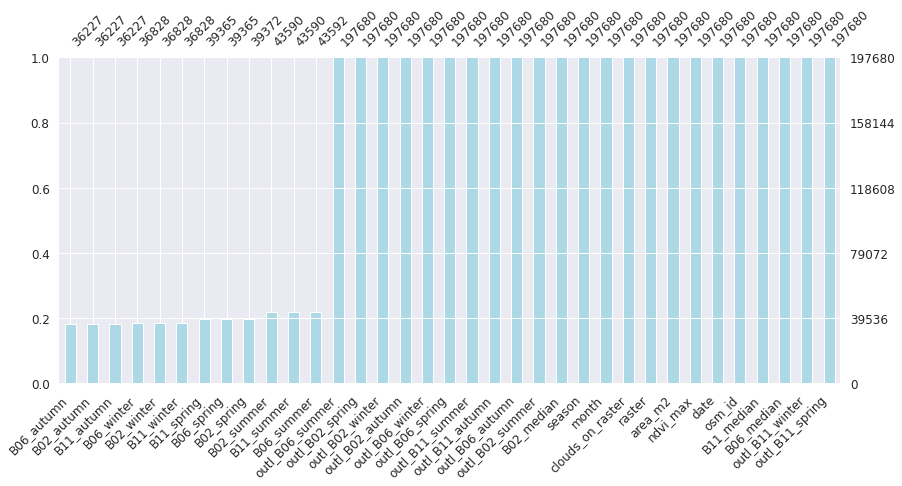

In [ ]:
# Volvemos a unir los subconjuntos estacionales en un mismo dataframe
df_interest_D2 = pd.concat([df_interest_summer, df_interest_autumn, df_interest_winter, df_interest_spring], ignore_index=True)
print(len(df_interest_D2))
msno.bar(df_interest_D2,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad:
    - < 40%

In [ ]:
# Filtramos por nubosidad < 40%
df_interest_D3 = df_interest_D2[df_interest_D2['clouds_on_raster']<40]
print(len(df_interest_D3))

160730


- __NORMALIZACION__

In [ ]:
# Aplicamos una estandarización de tipo Min Max Scaler. Este transforma las características escalándolas a un rango dado, por defecto (0,1).
# Este tipo de escalado suele denominarse frecuentemente "normalización"

from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_D3[vars_imput])
df_interest_D3.loc[:, vars_imput] = estandarizador.transform(df_interest_D3[vars_imput])
len(df_interest_D3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


160730

- Grabar los datos transformados

In [ ]:
df_interest_D3.to_csv("df_interest_D3_G1.csv", index=None)

## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

## Tabla comparativa

        Receta A  Receta B  Receta C  Receta D
Paso 1    208932    208932    208932    208932
Paso 2    167262    205008    197680    197680
Paso 3    137330    205008    145870    160730
Paso 4    133285    138213    160730    160730


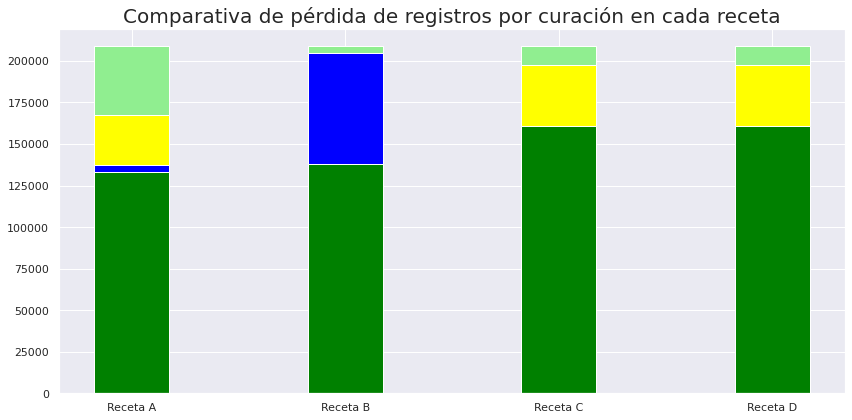

In [ ]:
# Tabla comparativa
import matplotlib.pyplot as plt

P1A = len(df_interest_A1)
P1B = len(df_interest_A2)
P1C = len(df_interest_A3)
P1D = len(df_interest_A4)
P2A = len(df_interest_B1)
P2B = len(df_interest_B2)
P2C = len(df_interest_B3)
P2D = len(df_interest_B4) 
P3A = len(df_interest_C1)
P3B = len(df_interest_C2)
P3C = len(df_interest_C3)
P3D = len(df_interest_C4)
P4A = len(df_interest_D1)
P4B = len(df_interest_D2)
P4C = len(df_interest_D3)
P4D = len(df_interest_D3) # No hay 4to paso

data= [[P1A,P2A,P3A,P4A], [P1B,P2B,P3B,P4B], [P1C,P2C,P3C,P4C],
        [P1D,P2D,P3D,P4D]]
columns = ('Receta A', 'Receta B', 'Receta C', 'Receta D')
rows= ('Paso 1', 'Paso 2', 'Paso 3', 'Paso 4')

TABLA = pd.DataFrame(data, rows, columns)
print(TABLA)

#########################################################################################   

a = [P1A,P2A,P3A,P4A]
b = [P1B,P2B,P3B,P4B]
c = [P1C,P2C,P3C,P4C]
d = [P1D,P2D,P3D,P4D]
ind = np.arange(len(a))

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.bar(x=ind, height=a, width=0.35,  align='center', color="lightgreen")
ax.bar(x=ind, height=b, width=0.35,  align='center', color="yellow")
ax.bar(x=ind, height=c, width=0.35,  align='center', color="blue")
ax.bar(x=ind, height=d, width=0.35,  align='center', color="green")
ax.set_title('Comparativa de pérdida de registros por curación en cada receta', fontsize=20)

labels= ['Receta A', 'Receta B', 'Receta C', 'Receta D']
plt.xticks(ind, labels)

plt.tight_layout()
plt.show()

## Receta [C-2] Filtrado Por Nubosidad + Remoción de Outliers + Imputacion Estacional 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_C1_1 = df_interest_A1.copy()
len(df_interest_C1_1)

208932

In [ ]:
# Filtramos por nubosidad < 20%
df_interest_C2_1 = df_interest_C1_1[df_interest_C1_1['clouds_on_raster']<20]
print(len(df_interest_C2_1))

152914


In [ ]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_C2_1['date']= pd.to_datetime(df_interest_C2_1['date'])

# Extraemos el mes de cada registro.
df_interest_C2_1['month'] = df_interest_C2_1['date'].dt.month

# Aplicamos la función (seasons)creada anteriormente para determinar la estación a la que corresponde cada registro.
seasons(df_interest_C2_1, "month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'summer', 'B02_summer'] = df_interest_C2_1['B02_median']  
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'autumn', 'B02_autumn'] = df_interest_C2_1['B02_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'winter', 'B02_winter'] = df_interest_C2_1['B02_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'spring', 'B02_spring'] = df_interest_C2_1['B02_median']

df_interest_C2_1.loc[df_interest_C2_1['season'] == 'summer', 'B06_summer'] = df_interest_C2_1['B06_median']  
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'autumn', 'B06_autumn'] = df_interest_C2_1['B06_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'winter', 'B06_winter'] = df_interest_C2_1['B06_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'spring', 'B06_spring'] = df_interest_C2_1['B06_median']

df_interest_C2_1.loc[df_interest_C2_1['season'] == 'summer', 'B11_summer'] = df_interest_C2_1['B11_median']  
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'autumn', 'B11_autumn'] = df_interest_C2_1['B11_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'winter', 'B11_winter'] = df_interest_C2_1['B11_median']
df_interest_C2_1.loc[df_interest_C2_1['season'] == 'spring', 'B11_spring'] = df_interest_C2_1['B11_median']

# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

# Aplicamos la función de detección de outliers
find_outliers(df_interest_C2_1, Season_values)

# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_C2_1_summer = df_interest_C2_1[~((df_interest_C2_1['outl_B02_summer']==1) & (df_interest_C2_1['outl_B06_summer']==1) & 
                        (df_interest_C2_1['outl_B11_summer']==1))]
print(len(df_interest_C2_1_summer))

df_interest_C2_1_autumn = df_interest_C2_1_summer[~((df_interest_C2_1_summer['outl_B02_autumn']==1) & 
                        (df_interest_C2_1_summer['outl_B06_autumn']==1) & (df_interest_C2_1_summer['outl_B11_autumn']==1))]
print(len(df_interest_C2_1_autumn))

df_interest_C2_1_winter = df_interest_C2_1_autumn[~((df_interest_C2_1_autumn['outl_B02_winter']==1) & 
                        (df_interest_C2_1_autumn['outl_B06_winter']==1) & (df_interest_C2_1_autumn['outl_B11_winter']==1))]
print(len(df_interest_C2_1_winter))

df_interest_C2_1_spring = df_interest_C2_1_winter[~((df_interest_C2_1_winter['outl_B02_spring']==1) & 
                        (df_interest_C2_1_winter['outl_B06_spring']==1) & (df_interest_C2_1_winter['outl_B11_spring']==1))]
print(len(df_interest_C2_1_spring))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

150884
148623
146365
144777


In [ ]:
df_interest_summerXX = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="summer"]
df_interest_autumnXX = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="autumn"]
df_interest_winterXX= df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="winter"]
df_interest_springXX = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="spring"]

In [ ]:
# Dividimos el conjunto de datos por estación
df_interest_summer = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="summer"]
df_interest_autumn = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="autumn"]
df_interest_winter = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="winter"]
df_interest_spring = df_interest_C2_1_spring[df_interest_C2_1_spring['season']=="spring"]

In [ ]:
# Imputamos valores nulos a nivel estacional bajo Forward fill y Backward fill combinados
vars_imput = ["B02_median","B06_median","B11_median", "ndvi_max"]

df_interest_summer[vars_imput]=df_interest_summer[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_autumn[vars_imput]=df_interest_autumn[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_winter[vars_imput]=df_interest_winter[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_spring[vars_imput]=df_interest_spring[vars_imput].fillna(method='ffill').fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# Creamos la data específica para las gráficas
df_imp_ndvi_summer_C11 = df_interest_summer.ndvi_max.to_frame()
df_imp_ndvi_summer_C11['Imputation'] = 'Datos Imputados'
df_ndvi_summer_C11= df_interest_summerXX.ndvi_max.dropna().to_frame()
df_ndvi_summer_C11['Imputation'] = 'Original'
data_ver_C11 = pd.concat([df_imp_ndvi_summer_D, df_ndvi_summer_D], ignore_index=True)

df_imp_ndvi_autumn_C11 = df_interest_autumn.ndvi_max.to_frame()
df_imp_ndvi_autumn_C11['Imputation'] = 'Datos Imputados'
df_ndvi_autumn_C11 = df_interest_autumnXX.ndvi_max.dropna().to_frame()
df_ndvi_autumn_C11['Imputation'] = 'Original'
data_ot_C11 = pd.concat([df_imp_ndvi_autumn_C11, df_ndvi_autumn_C11], ignore_index=True)

df_imp_ndvi_winter_C11 = df_interest_winter.ndvi_max.to_frame()
df_imp_ndvi_winter_C11['Imputation'] = 'Datos Imputados'
df_ndvi_winter_C11 = df_interest_winterXX.ndvi_max.dropna().to_frame()
df_ndvi_winter_C11['Imputation'] = 'Original'
data_inv_C11 = pd.concat([df_imp_ndvi_winter_C11, df_ndvi_winter_C11], ignore_index=True)

df_imp_ndvi_spring_C11 = df_interest_spring.ndvi_max.to_frame()
df_imp_ndvi_spring_C11['Imputation'] = 'Datos Imputados'
df_ndvi_spring_C11 = df_interest_springXX.ndvi_max.dropna().to_frame()
df_ndvi_spring_C11['Imputation'] = 'Original'
data_pri_C11 = pd.concat([df_imp_ndvi_spring_C11, df_ndvi_spring_C11], ignore_index=True)

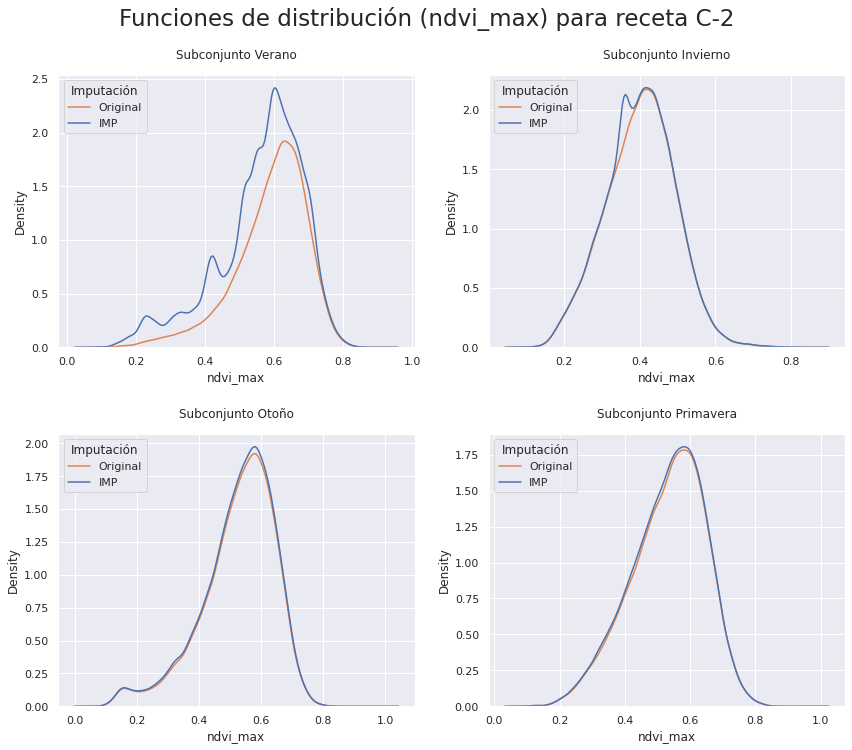

In [ ]:
# Creamos las gráficas en un plot múltiple
plt.figure(figsize=(12,10))
plt.suptitle('Funciones de distribución (ndvi_max) para receta C-2', x=0.5, y=1.04, fontsize=23)

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_ver_C11, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Verano', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_inv_C11, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_ot_C11, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Otoño', pad=16)
plt.tight_layout(h_pad=2, w_pad=2)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_pri_C11, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Primavera', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'IMP']);

144777


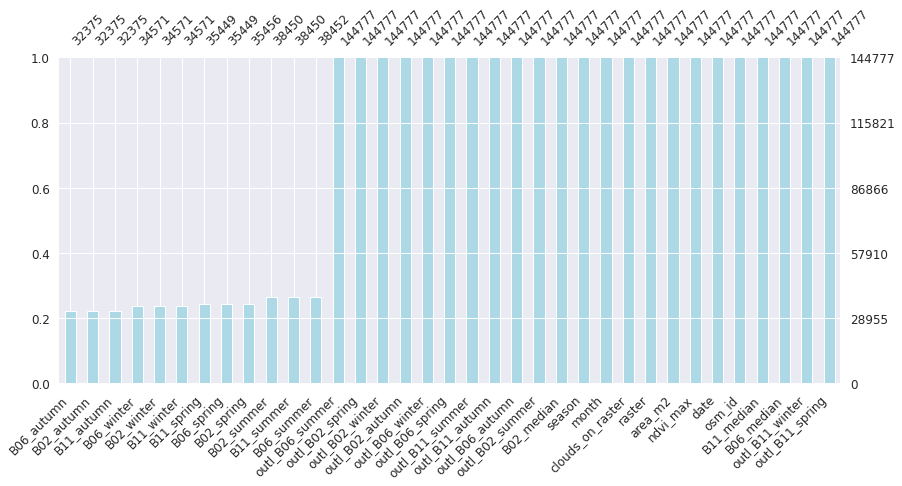

In [ ]:
# Volvemos a unir los subconjuntos estacionales en un mismo dataframe
df_interest_C11 = pd.concat([df_interest_summer, df_interest_autumn, df_interest_winter, df_interest_spring], ignore_index=True)
print(len(df_interest_C11))
msno.bar(df_interest_C11,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue');

**Obervamos en la distribución ndvi_max (si primero se filtran los datos por nubosidad, luego se remueven outliers para finalmente imputar datos faltantes) que su función densidad imputada tiene un comportamiento muy similar a su función sin imputar.**  

## __Extra 1__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

### Receta [Extra]a = Remoción de Outliers a nivel estacional + Normalización + Filtrado Por  10% de Nubosidad + Imputación Estacional

### Receta [Extra]b = Remoción de Outliers a nivel estacional+ Normalización + Imputación Estacional

##Paso 1 - Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [ ]:
# Creamos un nuevo dataframe con las variables de interés 
df_interest_E = df_interest_A1[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_E)

208932

In [ ]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_E['date']= pd.to_datetime(df_interest_E['date'])

# Extraemos el mes de cada registro.
df_interest_E['month'] = df_interest_E['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_E, "month")
df_interest_E

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [ ]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_E.loc[df_interest_E['season'] == 'summer', 'B02_summer'] = df_interest_E['B02_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B02_autumn'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B02_winter'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B02_spring'] = df_interest_E['B02_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B06_summer'] = df_interest_E['B06_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B06_autumn'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B06_winter'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B06_spring'] = df_interest_E['B06_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B11_summer'] = df_interest_E['B11_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B11_autumn'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B11_winter'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B11_spring'] = df_interest_E['B11_median']

In [ ]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

In [ ]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [ ]:
# Aplicamos la función de detección de outliers
find_outliers(df_interest_E, Season_values)

In [ ]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_E2_summer = df_interest_E[~((df_interest_E['outl_B02_summer']==1) & (df_interest_E['outl_B06_summer']==1) & 
                        (df_interest_E['outl_B11_summer']==1))]
print(len(df_interest_E2_summer))

df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_E2_summer['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
print(len(df_interest_E2_autumn))

df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_E2_autumn['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
print(len(df_interest_E2_winter))

df_interest_E2_spring = df_interest_E2_winter[~((df_interest_E2_winter['outl_B02_spring']==1) & 
                        (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
print(len(df_interest_E2_spring))

205669
202722
200130
197680


Dividimos el conjunto de datos por estación

In [ ]:
df_interest_E2_spring.columns

Index(['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season',
       'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer',
       'B06_autumn', 'B06_winter', 'B06_spring', 'B11_summer', 'B11_autumn',
       'B11_winter', 'B11_spring', 'outl_B02_summer', 'outl_B02_autumn',
       'outl_B02_winter', 'outl_B02_spring', 'outl_B06_summer',
       'outl_B06_autumn', 'outl_B06_winter', 'outl_B06_spring',
       'outl_B11_summer', 'outl_B11_autumn', 'outl_B11_winter',
       'outl_B11_spring'],
      dtype='object')

In [ ]:
df_interest_summer = df_interest_E2_spring[df_interest_E2_spring['season']=="summer"]
df_interest_autumn = df_interest_E2_spring[df_interest_E2_spring['season']=="autumn"]
df_interest_winter = df_interest_E2_spring[df_interest_E2_spring['season']=="winter"]
df_interest_spring = df_interest_E2_spring[df_interest_E2_spring['season']=="spring"]

Seleccionamos las columnas de interés para cada subconjunto

In [ ]:
df_summer = df_interest_summer[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season']]

df_autumn = df_interest_autumn[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season']]

df_winter = df_interest_winter[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season']]

df_spring = df_interest_spring[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season']]                    

##Paso 2 - Normalización para cada subconjunto
Utilizamos el objeto scikit-learn MinMaxScaler para escalar los datos, debido a que imputaremos por los K-vecinos más cercanos. Dicho algoritmo utiliza medidas de distancias y se ve afectado por la escala de las variables de entrada. Efectuamos la normalización para cada subconjunto por separado.

In [ ]:
cols_summer = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max']
cols_autumn = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max']
cols_winter = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max']
cols_spring = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Subconjunto verano
estandarizador1 = MinMaxScaler()
estandarizador1.fit(df_summer[cols_summer])
df_summer.loc[:, cols_summer] = estandarizador1.transform(df_summer[cols_summer])
df_summer

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.059714,0.434332,0.417777,605976736,2017-01-03,0.662894,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.084792,0.630283,0.598532,559322368,2017-01-03,0.661913,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.100435,0.617004,0.577331,559322369,2017-01-03,0.652560,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.102048,0.738461,0.632645,559328111,2017-01-03,0.708477,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.124022,0.743644,0.694482,559328112,2017-01-03,0.649143,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
206656,0.101676,0.593684,0.498777,307531370,2022-03-28,0.674109,3658.725375,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer
206657,0.067412,0.485182,0.421854,307532496,2022-03-28,0.663206,3824.467794,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer
206658,0.119801,0.661215,0.607774,307535460,2022-03-28,0.615957,7184.535857,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer
206659,0.058473,0.581862,0.499320,307796387,2022-03-28,0.703242,1147.997645,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer


In [ ]:
#Subconjunto otoño
estandarizador2 = MinMaxScaler()
estandarizador2.fit(df_autumn[cols_autumn])
df_autumn.loc[:, cols_autumn] = estandarizador2.transform(df_autumn[cols_autumn])
df_autumn

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
4542,NaN,NaN,NaN,567533027,2017-04-03,NaN,11345.928553,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn
4543,NaN,NaN,NaN,567533024,2017-04-03,NaN,1203.377855,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn
4544,NaN,NaN,NaN,567186536,2017-04-03,NaN,5343.511217,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn
4545,NaN,NaN,NaN,559322369,2017-04-03,NaN,2004.192528,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn
4546,NaN,NaN,NaN,559328112,2017-04-03,NaN,4587.356048,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.127158,0.484265,0.432084,307532496,2022-04-17,0.544724,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn
208928,0.216076,0.588070,0.652071,307535460,2022-04-17,0.468146,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn
208929,0.103211,0.543917,0.518343,307796387,2022-04-17,0.547404,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn
208930,0.175422,0.495538,0.603024,307097955,2022-04-17,0.513764,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn


In [ ]:
#Subconjunto invierno
estandarizador3 = MinMaxScaler()
estandarizador3.fit(df_winter[cols_winter])
df_winter.loc[:, cols_winter] = estandarizador3.transform(df_winter[cols_winter])
df_winter

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
7570,NaN,NaN,NaN,605976737,2017-07-12,NaN,4310.381780,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter
7571,NaN,NaN,NaN,605976738,2017-07-12,NaN,1701.355603,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter
7572,NaN,NaN,NaN,559322368,2017-07-12,NaN,1502.000513,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter
7573,NaN,NaN,NaN,559322369,2017-07-12,NaN,2004.192528,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter
7574,NaN,NaN,NaN,559328111,2017-07-12,NaN,6940.507640,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter
...,...,...,...,...,...,...,...,...,...,...,...
183189,0.300622,0.700000,0.653785,308115425,2021-09-29,0.449080,5783.100639,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter
183190,0.144090,0.168578,0.104420,308115608,2021-09-29,0.268492,1414.554340,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter
183191,0.218944,0.800849,0.624140,308220055,2021-09-29,0.638596,2594.278780,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter
183192,0.268714,0.792144,0.735310,307796387,2021-09-29,0.467793,1147.997645,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter


In [ ]:
#subconjunto primavera
estandarizador4 = MinMaxScaler()
estandarizador4.fit(df_spring[cols_spring])
df_spring.loc[:, cols_spring] = estandarizador4.transform(df_spring[cols_spring])
df_spring

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
12869,0.109339,0.527922,0.541925,307531370,2017-10-15,0.588559,3658.725375,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring
12870,0.062462,0.478571,0.489605,307532496,2017-10-15,0.561315,3824.467794,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring
12871,0.133759,0.590260,0.686355,307535460,2017-10-15,0.503925,7184.535857,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring
12872,0.148975,0.480519,0.621644,307818289,2017-10-15,0.401215,1041.152026,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring
12873,0.101853,0.539610,0.629905,307796632,2017-10-15,0.604364,6574.431543,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring
...,...,...,...,...,...,...,...,...,...,...,...
195301,NaN,NaN,NaN,559322369,2021-12-28,NaN,2004.192528,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring
195302,NaN,NaN,NaN,559322368,2021-12-28,NaN,1502.000513,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring
195303,NaN,NaN,NaN,572612095,2021-12-28,NaN,4056.927248,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring
195304,NaN,NaN,NaN,363076249,2021-12-28,NaN,1492.152733,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring


##Paso 3 - Solo Receta A. Aplicación de filtro por 10% de nubosidad

In [ ]:
# Filtramos por nubosidad < 10%
df_summer_clouds = df_summer[df_summer['clouds_on_raster']<10]
print(len(df_summer_clouds))

df_autumn_clouds = df_autumn[df_autumn['clouds_on_raster']<10]
print(len(df_autumn_clouds))

df_winter_clouds = df_winter[df_winter['clouds_on_raster']<10]
print(len(df_winter_clouds))

df_spring_clouds = df_spring[df_spring['clouds_on_raster']<10]
print(len(df_spring_clouds))

35610
28890
33727
35833


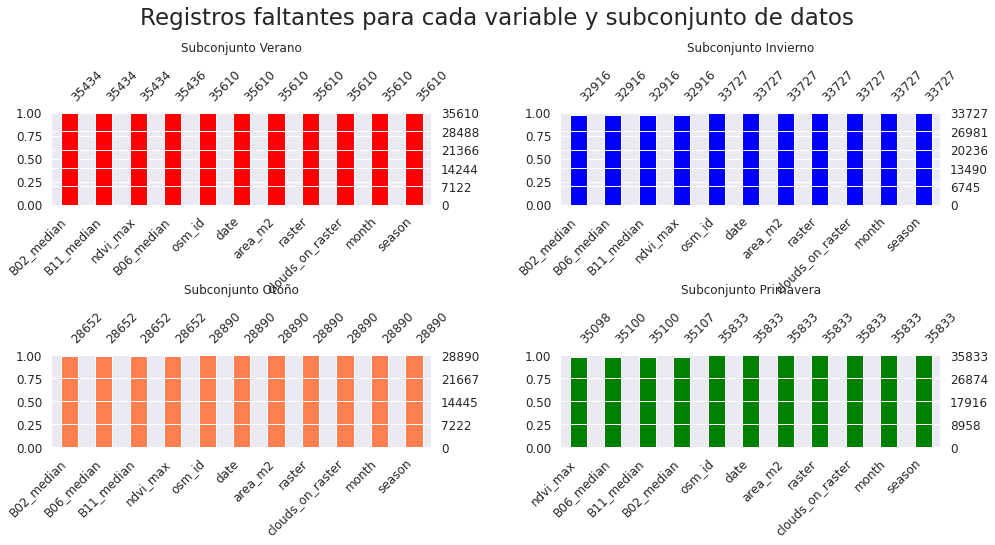

In [ ]:
# Graficamos registros faltantes
plt.figure(figsize=(12,10))
plt.suptitle('Registros faltantes para cada variable y subconjunto de datos', x=0.5, y=1.05, fontsize=23)

plt.subplot(2, 2, 1)
msno.bar(df_summer_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='red')
plt.title('Subconjunto Verano', pad=16)

plt.subplot(2, 2, 2)
msno.bar(df_winter_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=5, w_pad=3)

plt.subplot(2, 2, 3)
msno.bar(df_autumn_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')
plt.title('Subconjunto Otoño', pad=16)

plt.subplot(2, 2, 4)
msno.bar(df_spring_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='green')
plt.title('Subconjunto Primavera', pad=16);

##Paso 4 - Receta A. Imputación con filtro en nubosidad
Imputamos valores nulos a las variables bajo el criterio del K-vecino más cercano

In [ ]:
cols= ['ndvi_max', 'B02_median', 'B06_median', 'B11_median']

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

#Subconjunto verano
df_imp_summer = df_summer_clouds.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_summer[cols] = kn_imputer.fit_transform(df_imp_summer[cols])

#Subconjunto otoño
df_imp_autumn = df_autumn_clouds.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_autumn[cols] = kn_imputer.fit_transform(df_imp_autumn[cols])

#Subconjunto invierno
df_imp_winter = df_winter_clouds.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_winter[cols] = kn_imputer.fit_transform(df_imp_winter[cols])

#Subconjunto primavera
df_imp_spring = df_spring_clouds.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_spring[cols] = kn_imputer.fit_transform(df_imp_spring[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


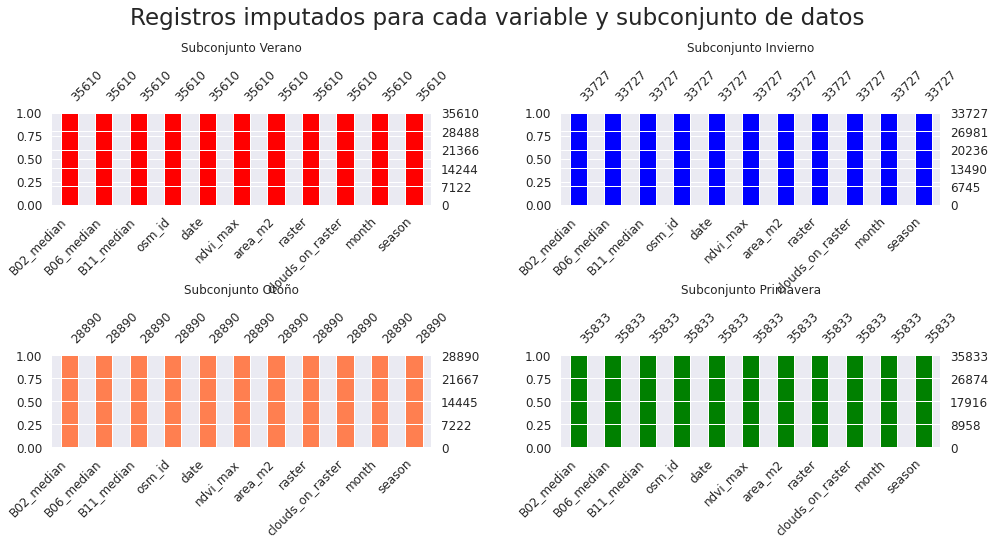

In [ ]:
# Gráficas
plt.figure(figsize=(12,10))
plt.suptitle('Registros imputados para cada variable y subconjunto de datos', x=0.5, y=1.05, fontsize=23)

plt.subplot(2, 2, 1)
msno.bar(df_imp_summer,figsize=(14, 6), sort="ascending",fontsize=12, color='red')
plt.title('Subconjunto Verano', pad=16)

plt.subplot(2, 2, 2)
msno.bar(df_imp_winter,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=5, w_pad=3)

plt.subplot(2, 2, 3)
msno.bar(df_imp_autumn,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')
plt.title('Subconjunto Otoño', pad=16)

plt.subplot(2, 2, 4)
msno.bar(df_imp_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='green')
plt.title('Subconjunto Primavera', pad=16);

Las siguientes gráficas muestran las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, con filtro en nubosidad.

In [ ]:
import seaborn as sns
sns.set_context('talk')

In [ ]:
# Creamos la data específica para las gráficas
df_imp_ndvi_summer = df_imp_summer.ndvi_max.to_frame()
df_imp_ndvi_summer['Imputation'] = 'KNN over ndvi_max'
df_ndvi_summer = df_summer_clouds.ndvi_max.dropna().to_frame()
df_ndvi_summer['Imputation'] = 'Original'
data_ver = pd.concat([df_imp_ndvi_summer, df_ndvi_summer], ignore_index=True)
df_imp_ndvi_winter = df_imp_winter.ndvi_max.to_frame()

df_imp_ndvi_autumn = df_imp_autumn.ndvi_max.to_frame()
df_imp_ndvi_autumn['Imputation'] = 'KNN over ndvi_max'
df_ndvi_autumn = df_autumn_clouds.ndvi_max.dropna().to_frame()
df_ndvi_autumn['Imputation'] = 'Original'
data_ot = pd.concat([df_imp_ndvi_autumn, df_ndvi_autumn], ignore_index=True)

df_imp_ndvi_winter = df_imp_winter.ndvi_max.to_frame()
df_imp_ndvi_winter['Imputation'] = 'KNN over ndvi_max'
df_ndvi_winter = df_winter_clouds.ndvi_max.dropna().to_frame()
df_ndvi_winter['Imputation'] = 'Original'
data_inv = pd.concat([df_imp_ndvi_winter, df_ndvi_winter], ignore_index=True)

df_imp_ndvi_spring = df_imp_spring.ndvi_max.to_frame()
df_imp_ndvi_spring['Imputation'] = 'KNN over ndvi_max'
df_ndvi_spring = df_spring_clouds.ndvi_max.dropna().to_frame()
df_ndvi_spring['Imputation'] = 'Original'
data_pri = pd.concat([df_imp_ndvi_spring, df_ndvi_spring], ignore_index=True)

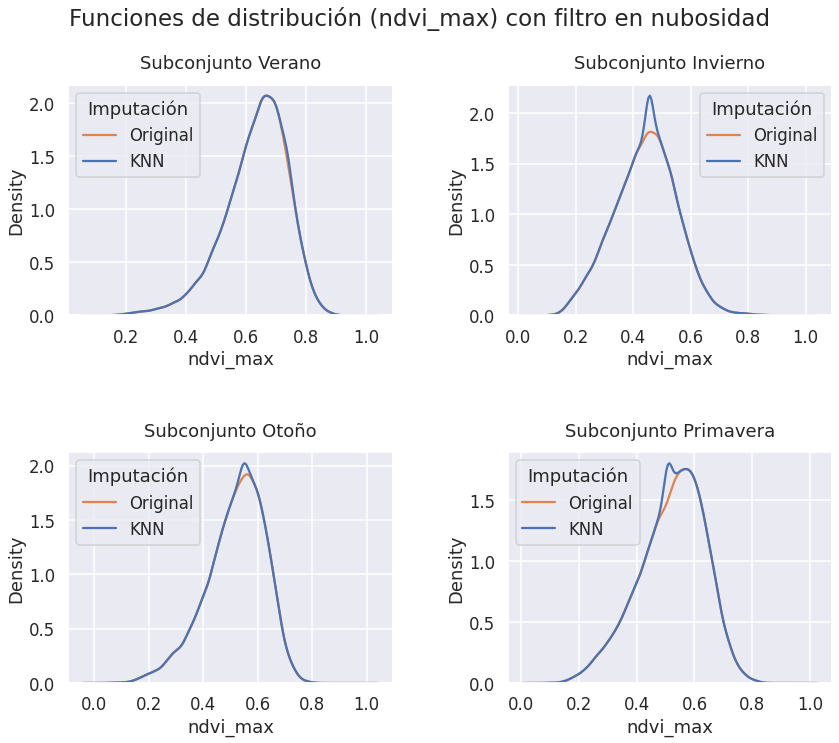

In [ ]:
# Creamos las gráficas en un plot múltiple
plt.figure(figsize=(12,10))
plt.suptitle('Funciones de distribución (ndvi_max) con filtro en nubosidad', x=0.5, y=1.04, fontsize=23)

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_ver, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Verano', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_inv, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=3, w_pad=3)
plt.legend(title='Imputación', loc='upper right', labels=['Original', 'KNN'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_ot, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Otoño', pad=16)
plt.tight_layout(h_pad=3, w_pad=3)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_pri, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Primavera', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

##Paso 4 - Receta B. Imputación sin filtro en nubosidad
Imputamos valores nulos a las variables bajo el criterio del K-vecino más cercano, sin realizar previamente el filtrado por nubosidad. Primeramente visualizamos los datos a imputar para cada uno de los subconjuntos.

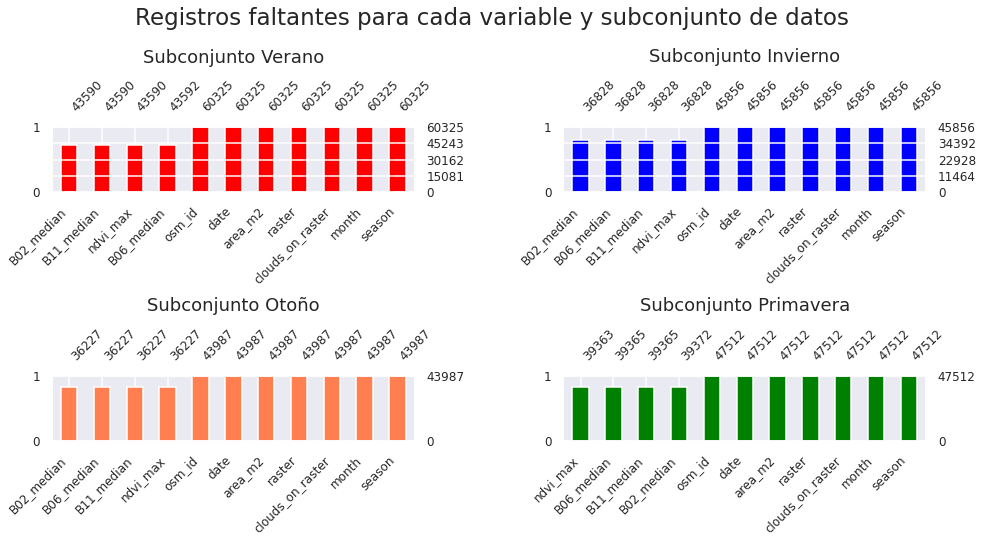

In [ ]:
# Primero graficamos registros faltantes
plt.figure(figsize=(12,10))
plt.suptitle('Registros faltantes para cada variable y subconjunto de datos', x=0.5, y=1.05, fontsize=23)

plt.subplot(2, 2, 1)
msno.bar(df_summer,figsize=(14, 6), sort="ascending",fontsize=12, color='red')
plt.title('Subconjunto Verano', pad=16)

plt.subplot(2, 2, 2)
msno.bar(df_winter,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=5, w_pad=3)

plt.subplot(2, 2, 3)
msno.bar(df_autumn,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')
plt.title('Subconjunto Otoño', pad=16)

plt.subplot(2, 2, 4)
msno.bar(df_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='green')
plt.title('Subconjunto Primavera', pad=16);

Observamos que los 4 subconjuntos estacionales presentan datos faltantes para imputar

**Imputación**

In [ ]:
#Subconjunto verano
df_imp_summer2 = df_summer.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_summer2[cols] = kn_imputer.fit_transform(df_imp_summer2[cols])

#Subconjunto otoño
df_imp_autumn2 = df_autumn.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_autumn2[cols] = kn_imputer.fit_transform(df_imp_autumn2[cols])

#Subconjunto invierno
df_imp_winter2 = df_winter.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_winter2[cols] = kn_imputer.fit_transform(df_imp_winter2[cols])

#Subconjunto primavera
df_imp_spring2 = df_spring.copy()
kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_spring2[cols] = kn_imputer.fit_transform(df_imp_spring2[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


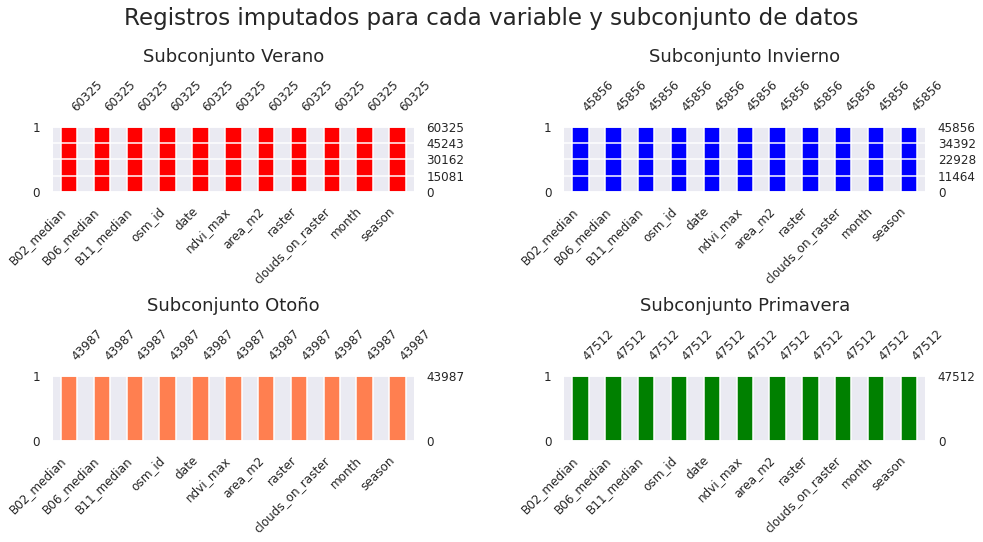

In [ ]:
# Graficamos las variables imputadas
plt.figure(figsize=(12,10))
plt.suptitle('Registros imputados para cada variable y subconjunto de datos', x=0.5, y=1.05, fontsize=23)

plt.subplot(2, 2, 1)
msno.bar(df_imp_summer2,figsize=(14, 6), sort="ascending",fontsize=12, color='red')
plt.title('Subconjunto Verano', pad=16)

plt.subplot(2, 2, 2)
msno.bar(df_imp_winter2,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=5, w_pad=3)

plt.subplot(2, 2, 3)
msno.bar(df_imp_autumn2,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')
plt.title('Subconjunto Otoño', pad=16)

plt.subplot(2, 2, 4)
msno.bar(df_imp_spring2,figsize=(14, 6), sort="ascending",fontsize=12, color='green')
plt.title('Subconjunto Primavera', pad=16);

Las siguientes gráficas muestran las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, sin filtro en nubosidad.

In [ ]:
# Creamos la data específica para las gráficas
df_imp_ndvi_summer2 = df_imp_summer2.ndvi_max.to_frame()
df_imp_ndvi_summer2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_summer2 = df_summer.ndvi_max.dropna().to_frame()
df_ndvi_summer2['Imputation'] = 'Original'
data_ver = pd.concat([df_imp_ndvi_summer2, df_ndvi_summer2], ignore_index=True)

df_imp_ndvi_autumn2 = df_imp_autumn2.ndvi_max.to_frame()
df_imp_ndvi_autumn2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_autumn2 = df_autumn.ndvi_max.dropna().to_frame()
df_ndvi_autumn2['Imputation'] = 'Original'
data_inv = pd.concat([df_imp_ndvi_autumn2, df_ndvi_autumn2], ignore_index=True)

df_imp_ndvi_winter2 = df_imp_winter2.ndvi_max.to_frame()
df_imp_ndvi_winter2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_winter2 = df_winter.ndvi_max.dropna().to_frame()
df_ndvi_winter2['Imputation'] = 'Original'
data_oto = pd.concat([df_imp_ndvi_winter2, df_ndvi_winter2], ignore_index=True)

df_imp_ndvi_spring2 = df_imp_spring2.ndvi_max.to_frame()
df_imp_ndvi_spring2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_spring2 = df_spring.ndvi_max.dropna().to_frame()
df_ndvi_spring2['Imputation'] = 'Original'
data_pri = pd.concat([df_imp_ndvi_spring2, df_ndvi_spring2], ignore_index=True)


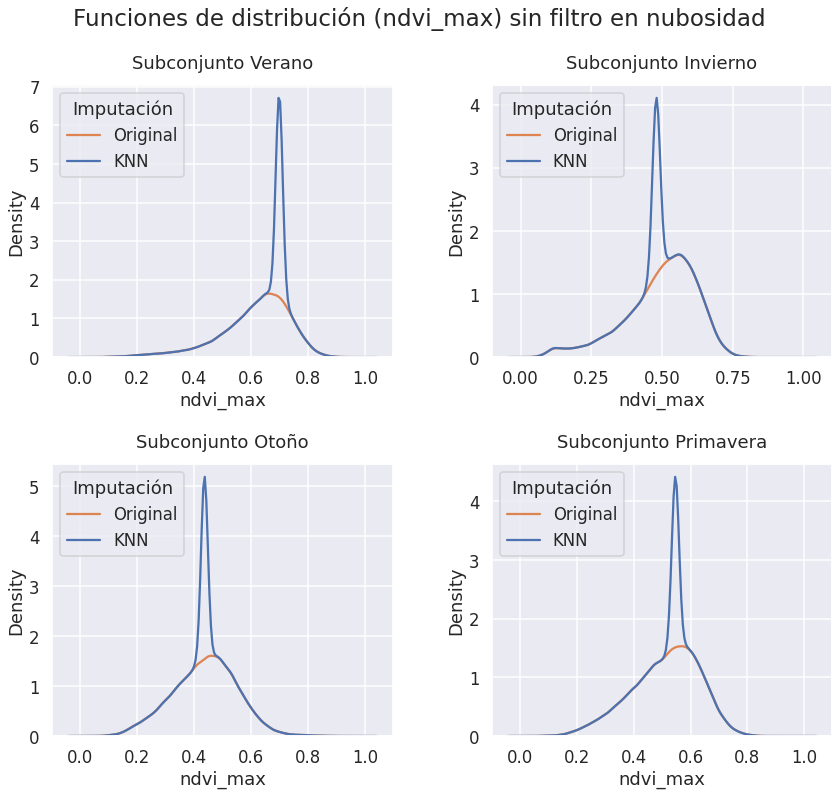

In [ ]:
# Creamos las gráficas en un plot múltiple
plt.figure(figsize=(12,10))
plt.suptitle('Funciones de distribución (ndvi_max) sin filtro en nubosidad', x=0.5, y=1.04, fontsize=23)

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_ver, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Verano', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_inv, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Invierno', pad=16)
plt.tight_layout(h_pad=3, w_pad=3)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_oto, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Otoño', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_pri, x='ndvi_max', hue='Imputation')
plt.title('Subconjunto Primavera', pad=16)
plt.legend(title='Imputación', loc='upper left', labels=['Original', 'KNN'])

##Unión de los datraframes estacionales

Dataframe con filtro en nubosidad

In [ ]:
#Dataframe con filtro en nubosidad
df_final_clouds =pd.concat([df_imp_summer,df_autumn_clouds,df_imp_winter,df_imp_spring],axis=0)

Dataframe sin filtro en nubosidad

In [ ]:
#Dataframe sin filtro en nubosidad
df_final2 =pd.concat([df_imp_summer2,df_imp_autumn2,df_imp_winter2,df_imp_spring2],axis=0)

In [ ]:
print(len(df_final_clouds))
print(len(df_final2))

134060
197680


##Grabamos los datos

In [ ]:
df_final_clouds.to_csv("df_filtro_Ment_G1.csv", index=None)
df_final2.to_csv("df_sin_filtro_Ment_G1.csv", index=None)

#DESCRAGA DE DATOS
#from google.colab import files
#files.download('df_filtro_Ment_G1.csv')
#files.download('df_sin_filtro_Ment_G1.csv')

#Conclusiones de la receta Extra 1

Observamos una diferencia importante en la sección donde realizamos imputación de los datos faltantes. Debido a que el estimador KNeighborsRegressor para imputar datos utiliza atributos cercanos que estén relacionados, no encontramos en nuestros datos seleccionados otros atributos que pudieran contribuir a la imputación. Es por ello que únicamente utilizamos los mismos 4 atributos a imputar para que entre ellos puedan "ayudarse". Efectivamente esto produce que las funciones de distribución de densidad presenten variaciones como "picos", un indicador del error que se comete. Si hubieramos utilizado algún atributo que estuviera relacionado, entonces las funciones de ditribución de densidad imputadas habrían tenido un comportamiento similiar a sus distribuciones sin imputar. 

Realizar un filtro en nubosidad reduce la cantidad de datos a imputar y esto afecta directamente a la imputación en el sentido que se cometerá menos error al imputar por las mismas 4 variables. Por ende, las distribuciones de los datos imputados se parecen a las distribuciones originales sin evidenciar “picos”.

## __Extra 2__

A los fines de darle continuidad al análisis en el práctico 1, en la primera parte de esta receta vamos a pensar al dataset como un conjunto de series de  tiempo donde el periodo abarca 2017- 2022 y las unidades de análisis son los osm_id con su 'name' asociado en los casos que está informado. Luego de este análisis vamos a transformar el dataset en un panel de datos ya que sería su estructura más natural: Es decir un conjunto de datos que combinan una dimensión temporal y otra transversal.

In [ ]:
# Descarga de archivo
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:01<00:00, 152MB/s]


In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime

######
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##se carga el dataset y se define a la fecha como índice
#df_=pd.read_csv("C:/Users/Varios/Desktop/Diplodatos/Mentoria/espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])
df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0,parse_dates=['date'])

df_ = df_.set_index('date')
display(df_.head())

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_mean,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.924291,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032
2017-01-03,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.979787,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513
2017-01-03,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.979928,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528
2017-01-03,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.983599,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640
2017-01-03,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,1.000021,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208932 entries, 2017-01-03 to 2022-04-17
Columns: 166 entries, B02_min to area_m2
dtypes: float64(140), int64(24), object(2)
memory usage: 266.2+ MB


In [ ]:
frecuencia_de_medicion_de_datos = (pd.Series(df_.index[1:]) - pd.Series(df_.index[:-1])).value_counts()
frecuencia_de_medicion_de_datos

0 days     208656
5 days        204
10 days        47
15 days        13
20 days         9
40 days         1
25 days         1
Name: date, dtype: int64

- Extraer las columnas de interes (## ab-initio)

In [ ]:
# Creamos un nuevo dataframe con las columnas de interés ya utilizadas en el trabajo práctico 1
df_interest_A1 = df_[["osm_id","area_m2","raster","name","B02_median", "B06_median", "B11_median", "ndvi_max", "clouds_on_raster"]]
len(df_interest_A1)
df_interest_A1.shape
##se convierte en dataframe
df_interest_A1=pd.DataFrame(df_interest_A1)

In [ ]:
##Para analizar en términos de series temporales se elige nuevamente el espacio verde "Parque Sarmiento"
df_interest_A1_ps=df_interest_A1[df_interest_A1['name']=='Parque Sarmiento']
import pandas as pd
pd.infer_freq(df_interest_A1_ps.index.values)

In [ ]:
counts=df_interest_A1_ps['osm_id'].value_counts()
counts
frecuencia_medicion_parque_sarmiento = (pd.Series(df_interest_A1_ps.index[1:]) - pd.Series(df_interest_A1_ps.index[:-1])).value_counts()
frecuencia_medicion_parque_sarmiento

5 days     204
10 days     47
15 days     13
20 days      9
40 days      1
25 days      1
Name: date, dtype: int64

In [ ]:
df_interest_A1_ps
df_interest_A1_ps = df_interest_A1_ps.sort_index()
df_interest_A1_ps.describe()

,osm_id,area_m2,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster
count,276.0,276.000000,234.000000,234.000000,234.000000,234.000000,276.000000
mean,6170329.0,859608.565917,0.122369,0.196468,0.201261,0.661145,19.473638
std,0.0,0.000000,0.033647,0.035754,0.040825,0.115607,33.484649
min,6170329.0,859608.565917,0.085600,0.080900,0.047800,0.179545,0.000000
25%,6170329.0,859608.565917,0.104850,0.172250,0.177163,0.598568,0.000000
50%,6170329.0,859608.565917,0.113900,0.192675,0.194850,0.690800,0.000000
75%,6170329.0,859608.565917,0.122875,0.210175,0.220625,0.747407,25.009939
max,6170329.0,859608.565917,0.293900,0.348050,0.357400,0.809364,100.000000


<Figure size 720x288 with 0 Axes>

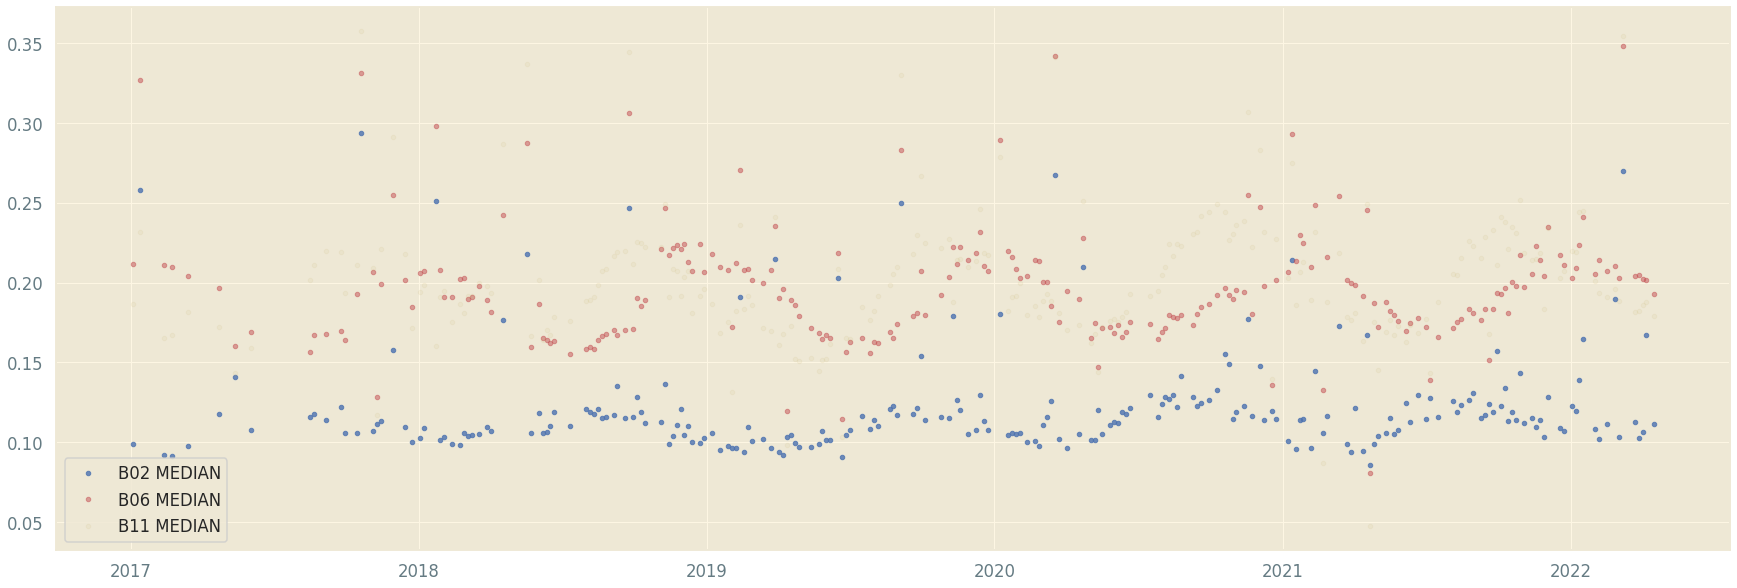

<Figure size 720x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(30,10))
from matplotlib import style
########  
# using the style for the plot
plt.style.use('Solarize_Light2')
########  
plt.plot(df_interest_A1_ps['B02_median'], 'b.', label = 'B02 MEDIAN',linewidth=0.5,alpha=0.8)
plt.plot(df_interest_A1_ps['B06_median'], 'r.', label = 'B06 MEDIAN',linewidth=0.5,alpha=0.5)
plt.plot(df_interest_A1_ps['B11_median'], 'y.', label = 'B11 MEDIAN',linewidth=0.5,alpha=0.1)
plt.legend()
plt.figure()

<Figure size 720x288 with 0 Axes>

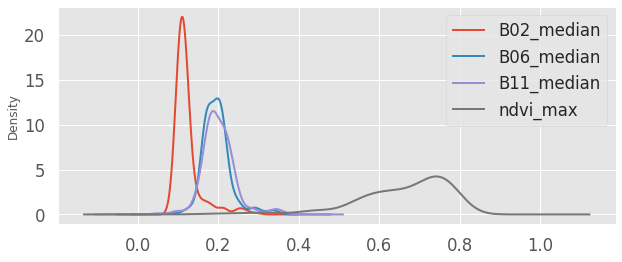

<Figure size 720x288 with 0 Axes>

In [ ]:
#Se grafican las densidades de las variables asociadas a las bandas
plt.style.use('ggplot')
df_interest_A1_ps['B02_median'].plot.kde()
df_interest_A1_ps['B06_median'].plot.kde()
df_interest_A1_ps['B11_median'].plot.kde()
df_interest_A1_ps['ndvi_max'].plot.kde()
plt.legend()
plt.figure()

<Figure size 720x288 with 0 Axes>

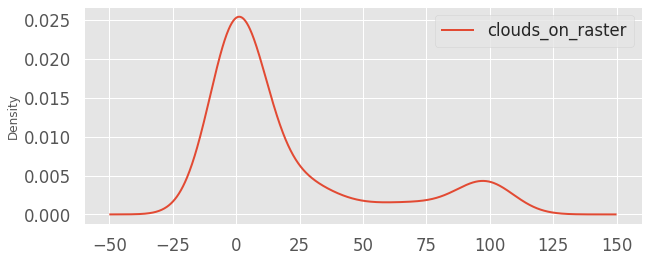

<Figure size 720x288 with 0 Axes>

In [ ]:
##densidad de la variable "clouds on raster"
df_interest_A1_ps['clouds_on_raster'].plot.kde()
plt.legend()
plt.figure()

In [ ]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno

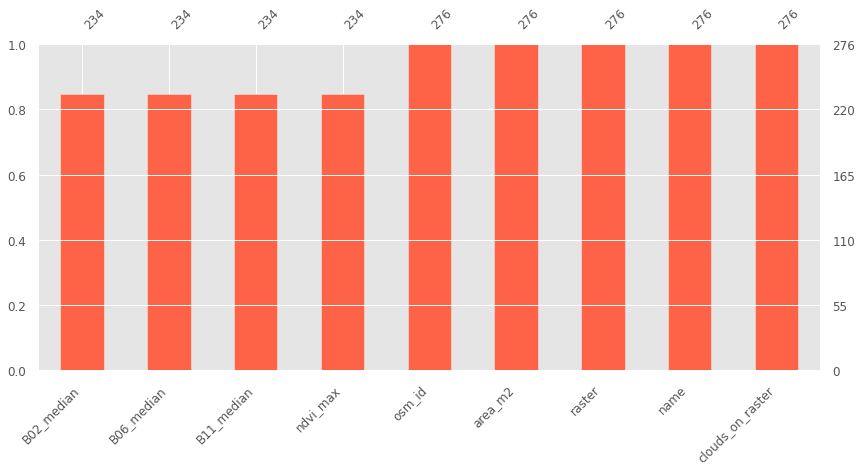

In [ ]:
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest_A1_ps,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

## Receta con descomposición de serie de tiempo

Bajo esta alternativa se remueven los outliers a partir de las variaciones observadas en el componente "ruido" de la serie de tiempo.

Primero se imputan los faltantes con  4 métodos alternativos y elegimos la imputación con interpolación slineal.

La idea de la descomposición de la serie es separar el componente sistemático del componente no sistemático.

La parte sistemática es la que puede ser modelada mientras la no sistemática no. 

Los tres componenetes de una serie de tiempo son:
-tendencia: es el componente de largo plazo que representa el crecimiento o disminución en la serie sobre un periodo amplio. 
-estacionalidad: representa los ciclos de corto plazo que se repiten a lo largo de la serie
-ruido: es la variación aleatoria de la serie

En este caso los gráficos de las series sugieren que se trataría de una serie estacionaria por lo cual sería recomendable utilizar el método aditivo de descomposición.

El modelo aditivo es apropiado cuando la magnitud de las
fluctuaciones estacionales de la serie no varıa al hacerlo la tendencia.

#y_i = t_i + s_i + n_i

done  y_i = el valor que asume la serie de tiempo en el momento i.
t_i = el componente tendencia en el momento i -presenta las variaciones a largo plazo-.
s_i = el componente estacional en el momento i -releja las variaciones a corto lazo-.
n_i = el ruido en el momenot i.


In [ ]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos una copia
df_interest_extra2 = df_interest_A1_ps.copy()
len(df_interest_extra2)
pd.infer_freq(df_interest_extra2.index.values)

In [ ]:
df_interest_extra2.describe()

,osm_id,area_m2,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster
count,276.0,276.000000,234.000000,234.000000,234.000000,234.000000,276.000000
mean,6170329.0,859608.565917,0.122369,0.196468,0.201261,0.661145,19.473638
std,0.0,0.000000,0.033647,0.035754,0.040825,0.115607,33.484649
min,6170329.0,859608.565917,0.085600,0.080900,0.047800,0.179545,0.000000
25%,6170329.0,859608.565917,0.104850,0.172250,0.177163,0.598568,0.000000
50%,6170329.0,859608.565917,0.113900,0.192675,0.194850,0.690800,0.000000
75%,6170329.0,859608.565917,0.122875,0.210175,0.220625,0.747407,25.009939
max,6170329.0,859608.565917,0.293900,0.348050,0.357400,0.809364,100.000000


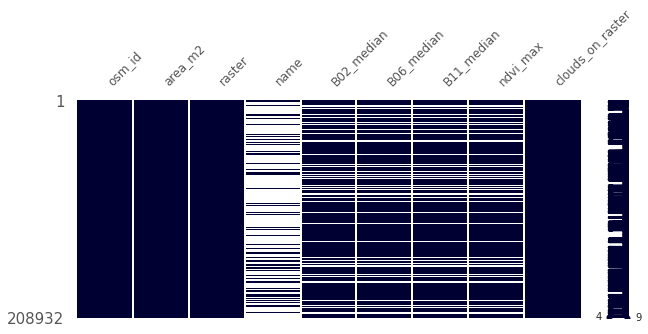

In [ ]:
##Observamos que los índices y bandas tienen valores faltantes en las mismas fechas.
msno.matrix(df_interest_A1,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

##Imputación de valores faltantes con métodos alternativos

Interpolación lineal: Esta técnica se origina en el análisis numérico, que estima valores desconocidos asumiendo una relación lineal dentro de un rango de puntos de datos, a diferencia de la extrapolación lineal, que estima datos fuera del rango de los puntos de datos proporcionados. Para estimar los valores faltantes utilizando la interpolación lineal, observamos los datos pasados y futuros del valor faltante. Ignora los índices y trata los datos como si estuvieran igualmente distribuidos.

Interpolación spline con grado 5: Spline utiliza un método de interpolación que estima valores usando una función matemática que minimiza la curvatura general de la superficie, lo que resulta en una superficie suave que pasa exactamente por los puntos de entrada.

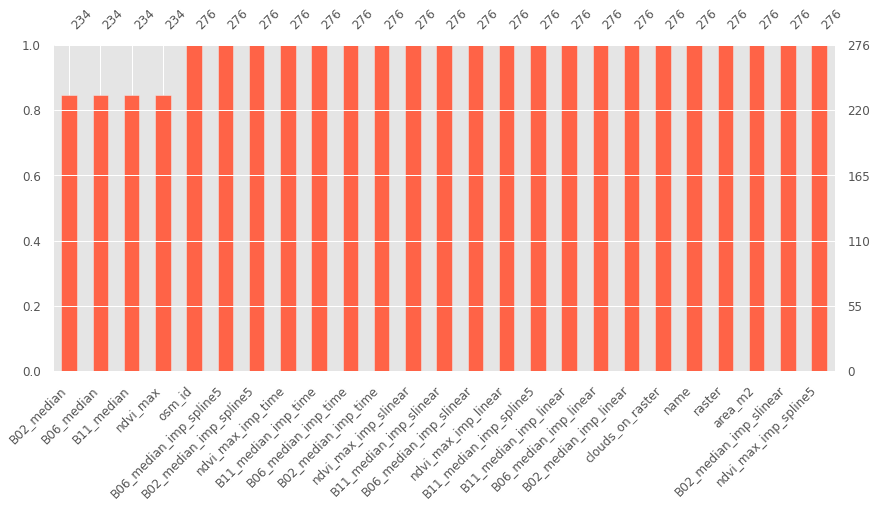

In [ ]:
#Interpolación lineal
df_interest_extra2[['B02_median_imp_linear', 'B06_median_imp_linear','B11_median_imp_linear','ndvi_max_imp_linear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='linear',limit_direction="both")    


#Interpolación slineal:  utiliza interpolación semilineal (se aproxima a una spline con grado1)
df_interest_extra2[['B02_median_imp_slinear', 'B06_median_imp_slinear','B11_median_imp_slinear','ndvi_max_imp_slinear']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='slinear',limit_direction="both")    


#Interpolación con método time trabaja sobre fechas e interpola dado el largo del intervalo (método time)
df_interest_extra2[['B02_median_imp_time', 'B06_median_imp_time','B11_median_imp_time','ndvi_max_imp_time']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='time')    

#########################

df_interest_extra2[['B02_median_imp_spline5', 'B06_median_imp_spline5','B11_median_imp_spline5','ndvi_max_imp_spline5']]=df_interest_extra2[['B02_median', 'B06_median','B11_median','ndvi_max']].interpolate(method='spline',order=5,limit_direction="both")    
########
#######
df_interest_extra2
###########################
#####################
msno.bar(df_interest_extra2,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 
####

In [ ]:
## se guarda el archivo con los datos imputados 
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_imputacion.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra2.to_csv(filepath) 

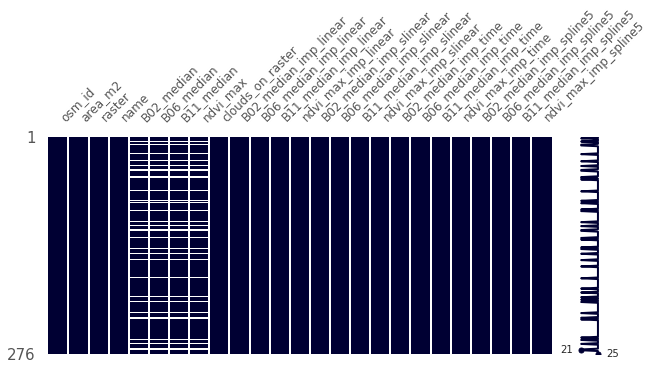

In [ ]:
msno.matrix(df_interest_extra2,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<Figure size 720x288 with 0 Axes>

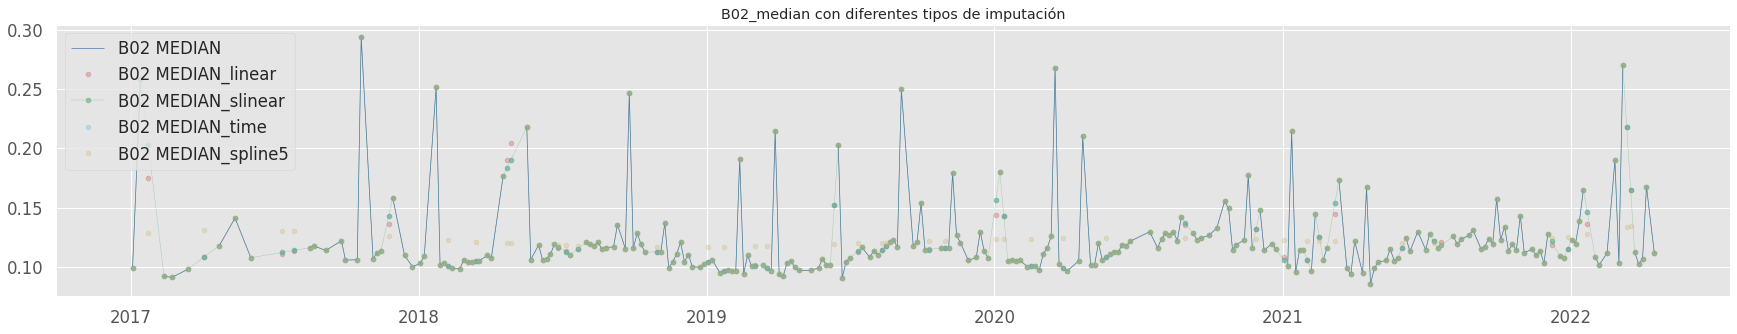

<Figure size 720x288 with 0 Axes>

In [ ]:
########  Graficos con imputaciones para B02_median
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['B02_median'], 'b-', label = 'B02 MEDIAN',linewidth=0.7,alpha=1)
plt.plot(df_interest_extra2['B02_median_imp_linear'], 'r.', label = 'B02 MEDIAN_linear',linewidth=0.5,alpha=0.3)
plt.plot(df_interest_extra2['B02_median_imp_slinear'], 'g.-', label = 'B02 MEDIAN_slinear',linewidth=0.4,alpha=0.5)
plt.plot(df_interest_extra2['B02_median_imp_time'], 'c.', label = 'B02 MEDIAN_time',linewidth=0.5,alpha=0.3)
plt.plot(df_interest_extra2['B02_median_imp_spline5'], 'y.', label = 'B02 MEDIAN_spline5',linewidth=0.3,alpha=0.3)
plt.legend()
plt.title("B02_median con diferentes tipos de imputación")
plt.figure()

<Figure size 720x288 with 0 Axes>

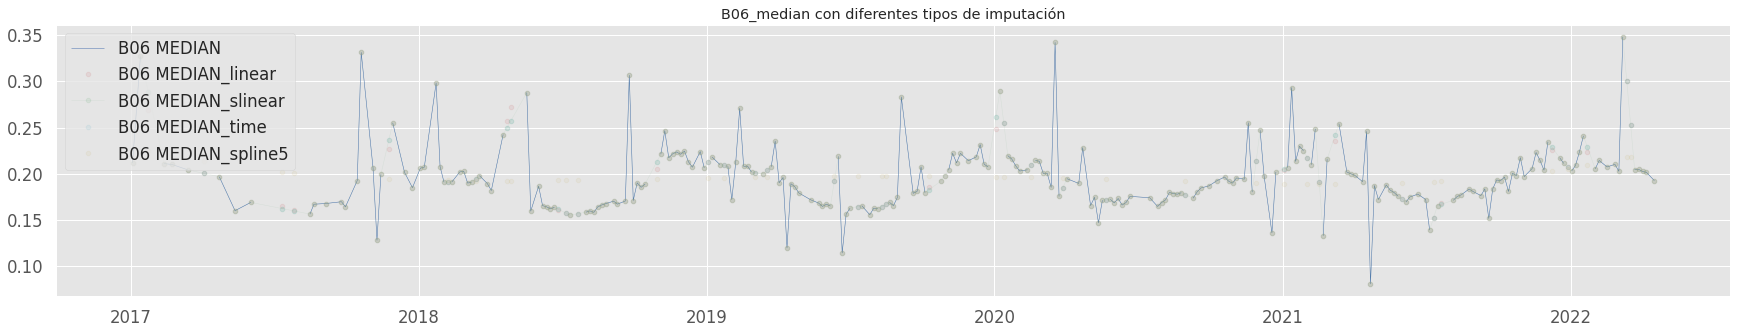

<Figure size 720x288 with 0 Axes>

In [ ]:
########  Graficos con imputaciones para B06_median
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['B06_median'], 'b-', label = 'B06 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B06_median_imp_linear'], 'r.', label = 'B06 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_slinear'], 'g.-', label = 'B06 MEDIAN_slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_time'], 'c.', label = 'B06 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B06_median_imp_spline5'], 'y.', label = 'B06 MEDIAN_spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.title("B06_median con diferentes tipos de imputación")

plt.figure()

<Figure size 720x288 with 0 Axes>

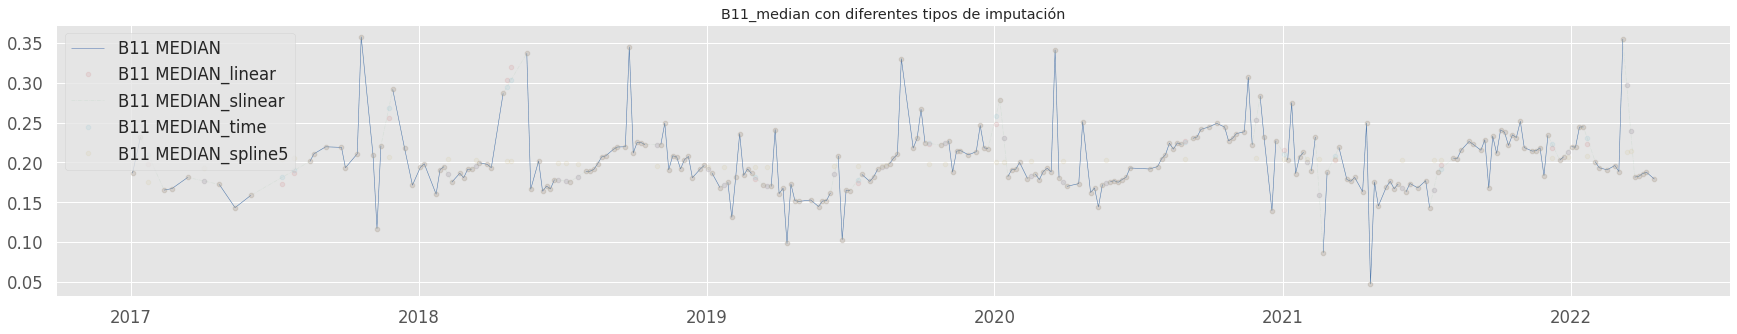

<Figure size 720x288 with 0 Axes>

In [ ]:
########  Graficos con imputaciones para B11_median
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['B11_median'], 'b-', label = 'B11 MEDIAN',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['B11_median_imp_linear'], 'r.', label = 'B11 MEDIAN_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_slinear'], 'g-.', label = 'B11 MEDIAN_slinear',linewidth=0.6,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_time'], 'c.', label = 'B11 MEDIAN_time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['B11_median_imp_spline5'], 'y.', label = 'B11 MEDIAN_spline5',linewidth=0.2,alpha=0.1)
plt.legend()
plt.title("B11_median con diferentes tipos de imputación")
plt.figure()

<Figure size 720x288 with 0 Axes>

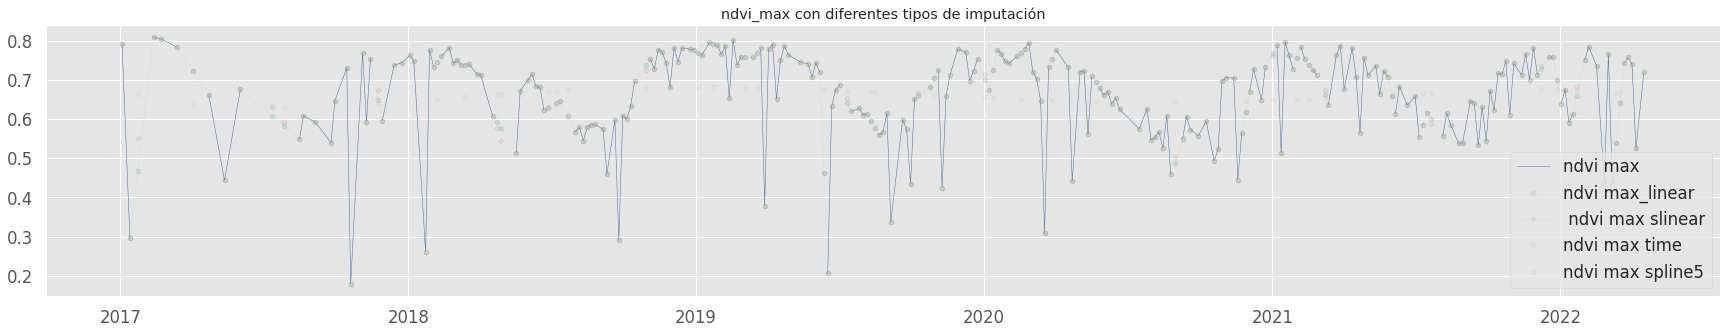

<Figure size 720x288 with 0 Axes>

In [ ]:
########  Graficos con imputaciones para ndvi_max
plt.figure(figsize=(30,5))
from matplotlib import style
plt.plot(df_interest_A1_ps['ndvi_max'], 'b-', label = 'ndvi max',linewidth=0.5,alpha=1)
plt.plot(df_interest_extra2['ndvi_max_imp_linear'], 'r.', label = 'ndvi max_linear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_slinear'], 'g.-', label = ' ndvi max slinear',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_time'], 'c.', label = 'ndvi max time',linewidth=0.5,alpha=0.1)
plt.plot(df_interest_extra2['ndvi_max_imp_spline5'], 'y.', label = 'ndvi max spline5',linewidth=0.5,alpha=0.1)
plt.legend()
plt.title("ndvi_max con diferentes tipos de imputación")
plt.figure()

In [ ]:
df_interest_extra2.describe()
df_interest_extra2.head()
df_interest_extra2=pd.DataFrame(df_interest_extra2)
df_interest_extra2

,osm_id,area_m2,raster,name,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster,B02_median_imp_linear,...,B11_median_imp_slinear,ndvi_max_imp_slinear,B02_median_imp_time,B06_median_imp_time,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0987,0.21180,0.18660,0.790476,0.000000,0.0987,...,0.18660,0.790476,0.098700,0.211800,0.18660,0.790476,0.098700,0.211800,0.186600,0.790476
2017-01-13,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,Parque Sarmiento,0.2580,0.32690,0.23170,0.295582,98.880824,0.2580,...,0.23170,0.295582,0.258000,0.326900,0.23170,0.295582,0.258000,0.326900,0.231700,0.295582
2017-01-23,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,NaN,NaN,NaN,NaN,84.099011,0.1750,...,0.20960,0.466842,0.202667,0.288267,0.20960,0.466842,0.128607,0.224746,0.176089,0.663880
2017-02-12,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0920,0.21100,0.16540,0.809364,0.000000,0.0920,...,0.16540,0.809364,0.092000,0.211000,0.16540,0.809364,0.092000,0.211000,0.165400,0.809364
2017-02-22,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0912,0.21010,0.16730,0.803294,0.000000,0.0912,...,0.16730,0.803294,0.091200,0.210100,0.16730,0.803294,0.091200,0.210100,0.167300,0.803294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1124,0.20440,0.18170,0.743007,0.000000,0.1124,...,0.18170,0.743007,0.112400,0.204400,0.18170,0.743007,0.112400,0.204400,0.181700,0.743007
2022-03-28,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1026,0.20480,0.18250,0.756883,0.000000,0.1026,...,0.18250,0.756883,0.102600,0.204800,0.18250,0.756883,0.102600,0.204800,0.182500,0.756883
2022-04-02,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1064,0.20250,0.18600,0.739026,0.000000,0.1064,...,0.18600,0.739026,0.106400,0.202500,0.18600,0.739026,0.106400,0.202500,0.186000,0.739026


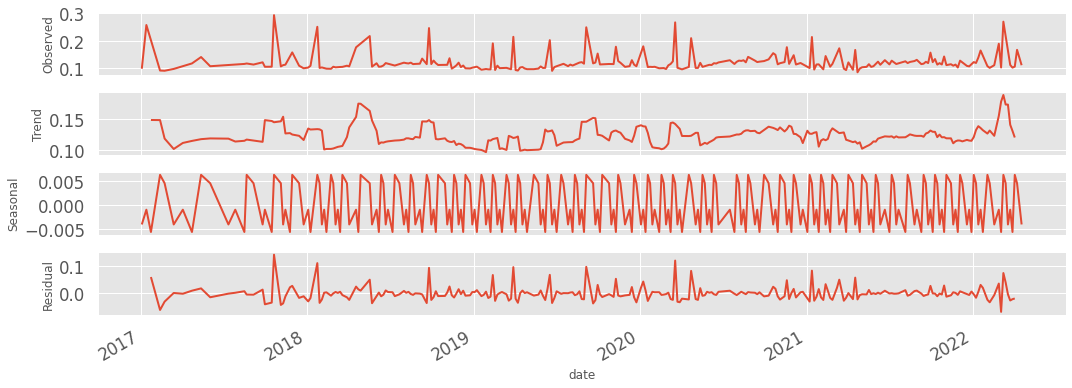

In [ ]:

###Se aplica el método aditivo para descomponer las series utilizando la imputacion slinear ya que de otro modo no funciona con NANs el método
# Additive Decomposition 
result_add_B02 = seasonal_decompose(df_interest_extra2['B02_median_imp_slinear'], model='additive',freq=5)
##se utilizó el parámetro freq = 5 dado que la mayoría de los datos estarían medidos con una distancia de 5 días.
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B02.plot()
from matplotlib import pyplot
pyplot.show()

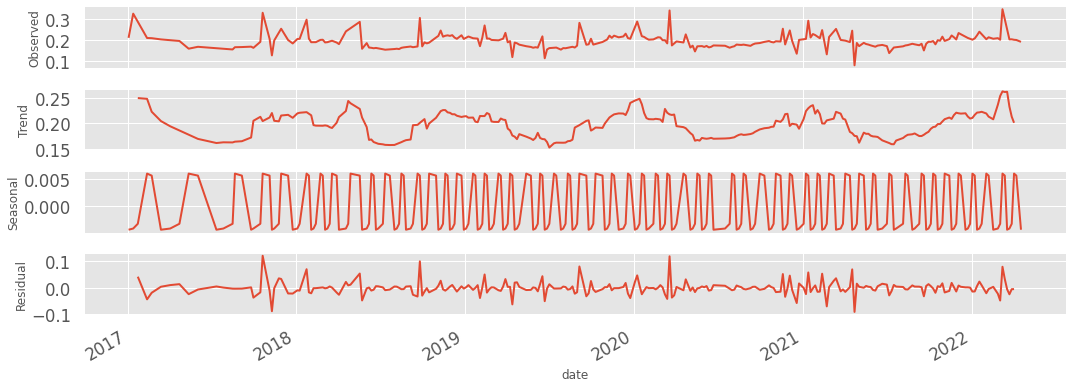

In [ ]:
# Additive Decomposition
result_add_B06 = seasonal_decompose(df_interest_extra2['B06_median_imp_slinear'], model='additive',freq=5)
##se utilizó el parámetro freq = 5 dado que la mayoría de los datos estarían medidos con una distancia de 5 días.
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B06.plot()
from matplotlib import pyplot
pyplot.show()

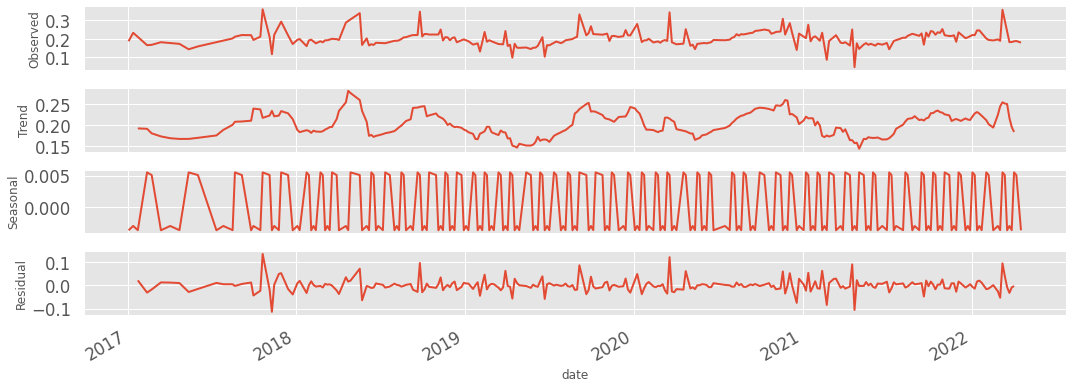

In [ ]:
# Additive Decomposition
result_add_B11 = seasonal_decompose(df_interest_extra2['B11_median_imp_slinear'], model='additive',freq=5)
# Plot
plt.rcParams["figure.figsize"] = (15,5.5)
result_add_B11.plot()
from matplotlib import pyplot
pyplot.show()

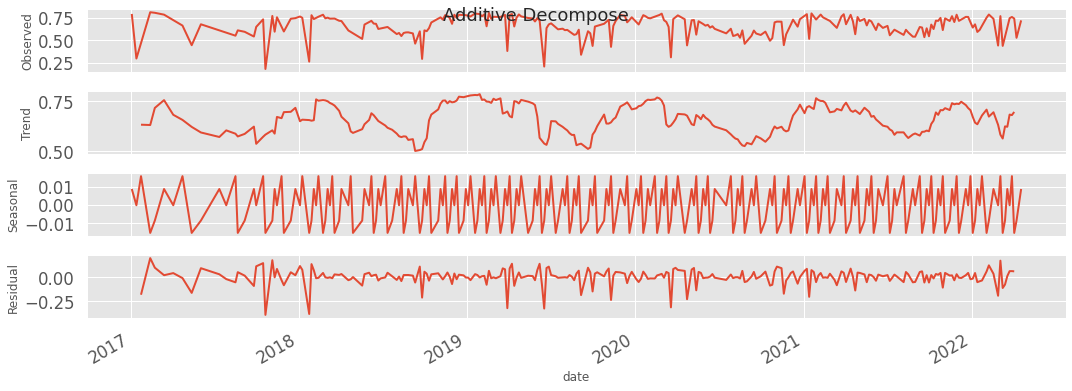

In [ ]:
#########################################
# Additive Decomposition
result_add_ndvi_max = seasonal_decompose(df_interest_extra2['ndvi_max_imp_slinear'], model='additive', freq=5)
# Plot
plt.rcParams.update({'figure.figsize': (15,5.5)})
result_add_ndvi_max.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

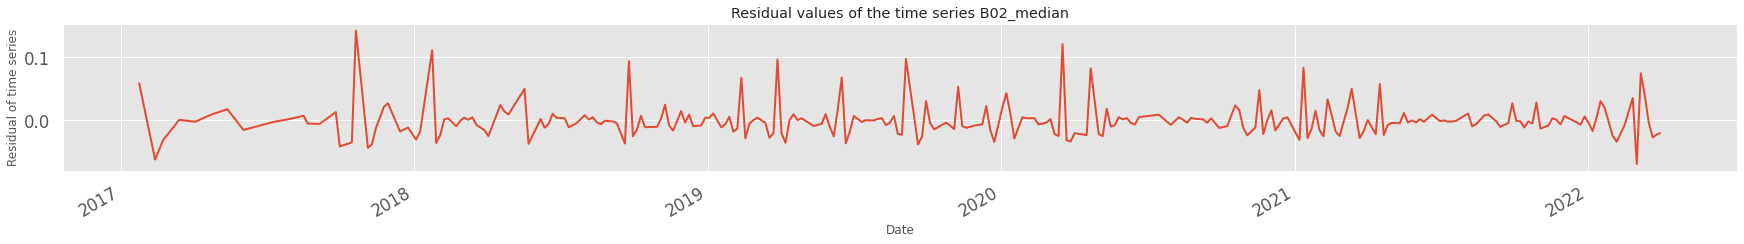

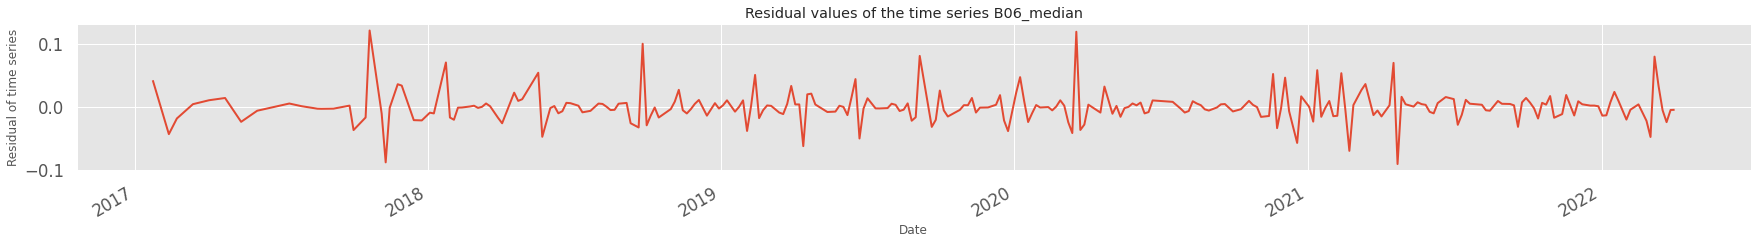

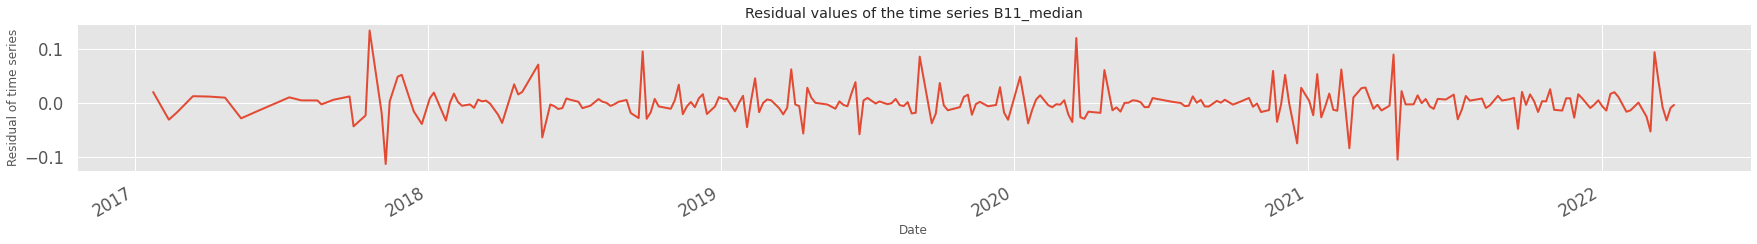

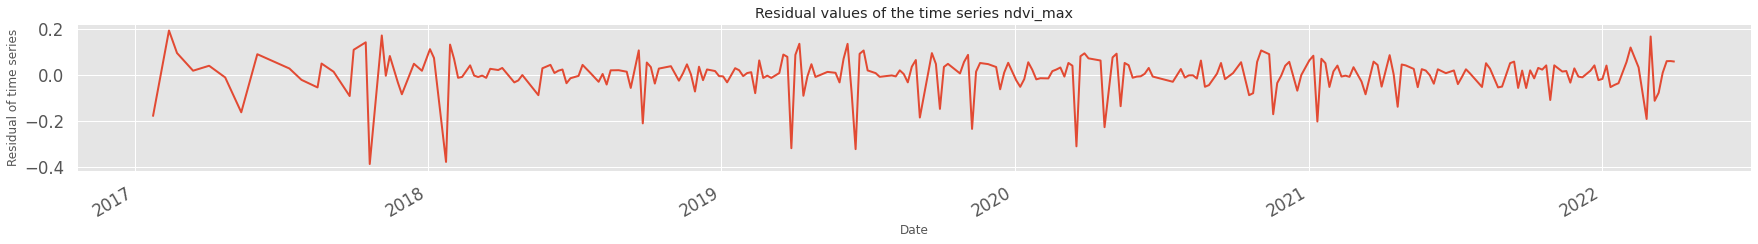

In [ ]:
##########################################
##Se grafica el componente 'noise' ###
decomp_resid_B02 = result_add_B02.resid
ax = decomp_resid_B02.plot(figsize=(30, 3))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B02_median')
plt.show()
#############
############
decomp_resid_B06 = result_add_B06.resid
ax = decomp_resid_B06.plot(figsize=(30, 3))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B06_median')
plt.show()
#############
############
decomp_resid_B11 = result_add_B11.resid
ax = decomp_resid_B11.plot(figsize=(30, 3))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series B11_median')
plt.show()

#####
decomp_resid_ndvi_max = result_add_ndvi_max.resid
ax = decomp_resid_ndvi_max.plot(figsize=(30, 3))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series ndvi_max')
plt.show()

 A partir del análisis del componente "noise", se quitan aquellas observaciones con residuos extremos. En este caso se utiliza el criterio del IQR pero se podría aplicar una análisis de ARMA para analizar el tipo de outlier que estamos identificando y luego decidir qué hacer.

In [ ]:
###################
decomp_resid_B02=pd.DataFrame(decomp_resid_B02)
decomp_resid_B02.columns=['resid']
decomp_resid_B02
q1 = decomp_resid_B02['resid'].quantile(0.25)
q3 = decomp_resid_B02['resid'].quantile(0.75)
iqr = q3 - q1 
################
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B02']=np.where((decomp_resid_B02['resid'] >ls)|(decomp_resid_B02['resid'] < li),1,0)
df_interest_extra2                 

decomp_resid_B06=pd.DataFrame(decomp_resid_B06)
decomp_resid_B06.columns=['resid']
q1 = decomp_resid_B06['resid'].quantile(0.25)
q3 = decomp_resid_B06['resid'].quantile(0.75)
iqr = q3 - q1 
        # calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr

# Generamos nueva columna
df_interest_extra2['out_B06']=np.where((decomp_resid_B06['resid'] >ls)|(decomp_resid_B06['resid'] < li),1,0)
df_interest_extra2

decomp_resid_B11=pd.DataFrame(decomp_resid_B11)
decomp_resid_B11.columns=['resid']
q1 = decomp_resid_B11['resid'].quantile(0.25)
q3 = decomp_resid_B11['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_B11']=np.where((decomp_resid_B11['resid'] >ls)|(decomp_resid_B11['resid'] < li),1,0)
df_interest_extra2
######################################################################
decomp_resid_ndvi_max=pd.DataFrame(decomp_resid_ndvi_max)
decomp_resid_ndvi_max.columns=['resid']
q1 = decomp_resid_ndvi_max['resid'].quantile(0.25)
q3 = decomp_resid_ndvi_max['resid'].quantile(0.75)
iqr = q3 - q1 
# calculamos límite superior e inferior
ls = q3 + 1.5 * iqr
li = q1 - 1.5 * iqr
# Generamos nueva columna
df_interest_extra2['out_ndvi_max']=np.where((decomp_resid_ndvi_max['resid'] >ls)|(decomp_resid_ndvi_max['resid']< li),1,0)
df_interest_extra2
#######################################################

,osm_id,area_m2,raster,name,B02_median,B06_median,B11_median,ndvi_max,clouds_on_raster,B02_median_imp_linear,...,B11_median_imp_time,ndvi_max_imp_time,B02_median_imp_spline5,B06_median_imp_spline5,B11_median_imp_spline5,ndvi_max_imp_spline5,out_B02,out_B06,out_B11,out_ndvi_max
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0987,0.21180,0.18660,0.790476,0.000000,0.0987,...,0.18660,0.790476,0.098700,0.211800,0.186600,0.790476,0,0,0,0
2017-01-13,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,Parque Sarmiento,0.2580,0.32690,0.23170,0.295582,98.880824,0.2580,...,0.23170,0.295582,0.258000,0.326900,0.231700,0.295582,0,0,0,0
2017-01-23,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,NaN,NaN,NaN,NaN,84.099011,0.1750,...,0.20960,0.466842,0.128607,0.224746,0.176089,0.663880,1,1,0,1
2017-02-12,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0920,0.21100,0.16540,0.809364,0.000000,0.0920,...,0.16540,0.809364,0.092000,0.211000,0.165400,0.809364,1,1,0,1
2017-02-22,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,Parque Sarmiento,0.0912,0.21010,0.16730,0.803294,0.000000,0.0912,...,0.16730,0.803294,0.091200,0.210100,0.167300,0.803294,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1124,0.20440,0.18170,0.743007,0.000000,0.1124,...,0.18170,0.743007,0.112400,0.204400,0.181700,0.743007,0,0,0,0
2022-03-28,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1026,0.20480,0.18250,0.756883,0.000000,0.1026,...,0.18250,0.756883,0.102600,0.204800,0.182500,0.756883,0,0,0,0
2022-04-02,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,Parque Sarmiento,0.1064,0.20250,0.18600,0.739026,0.000000,0.1064,...,0.18600,0.739026,0.106400,0.202500,0.186000,0.739026,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    233
2     14
3     13
4      9
1      7
Name: cant_var_outl, dtype: int64

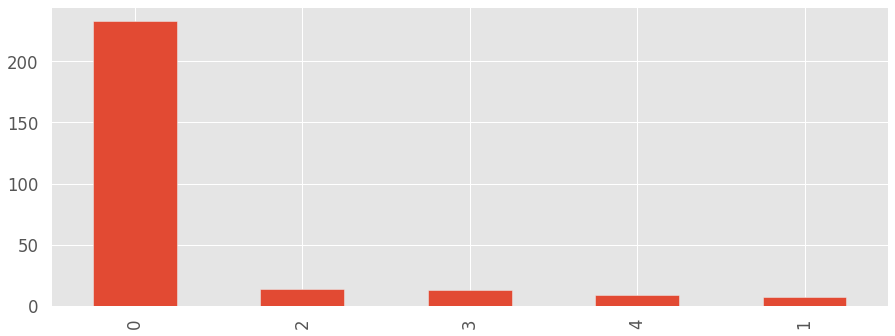

In [ ]:
df_interest_extra2_=df_interest_extra2[['B02_median_imp_slinear','B06_median_imp_slinear',
                                        'B11_median_imp_slinear','ndvi_max_imp_slinear',
                                        'out_B02','out_B06','out_B11','out_ndvi_max',
                                        'osm_id','area_m2','raster','clouds_on_raster']]
######
df_interest_extra2_
#######
df_interest_extra2_['cant_var_outl']= df_interest_extra2['out_B02']+df_interest_extra2_['out_B06']+df_interest_extra2_['out_B11']+df_interest_extra2_['out_ndvi_max']
##Cantidad de outliers por observación

df_interest_extra2_['cant_var_outl'].value_counts()[:10].plot(kind='bar')
df_interest_extra2_['cant_var_outl'].value_counts()


In [ ]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_extra3_ = df_interest_extra2_[~((df_interest_extra2['out_B02']==1) & 
                                  (df_interest_extra2_['out_B06']==1) & 
                                  (df_interest_extra2_['out_B11']==1)& 
                                  (df_interest_extra2_['out_ndvi_max']==1))]
len(df_interest_extra3_)
df_interest_extra3_

,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,out_ndvi_max,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl
date,,,,,,,,,,,,,
2017-01-03,0.098700,0.211800,0.18660,0.790476,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.000000,0
2017-01-13,0.258000,0.326900,0.23170,0.295582,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170113T142011_N0204_R010_T20JLL_2...,98.880824,0
2017-01-23,0.202667,0.288267,0.20960,0.466842,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170123T142031_N0204_R010_T20JLL_2...,84.099011,3
2017-02-12,0.092000,0.211000,0.16540,0.809364,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,0.000000,3
2017-02-22,0.091200,0.210100,0.16730,0.803294,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,0.112400,0.204400,0.18170,0.743007,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,0.000000,0
2022-03-28,0.102600,0.204800,0.18250,0.756883,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.000000,0
2022-04-02,0.106400,0.202500,0.18600,0.739026,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220402T141729_N0400_R010_T20JLL_2...,0.000000,0


Se quitaron las observaciones donde se observaron outliers en las 3 bandas elegidas y ndvi_max. En total suman 7 observaciones.

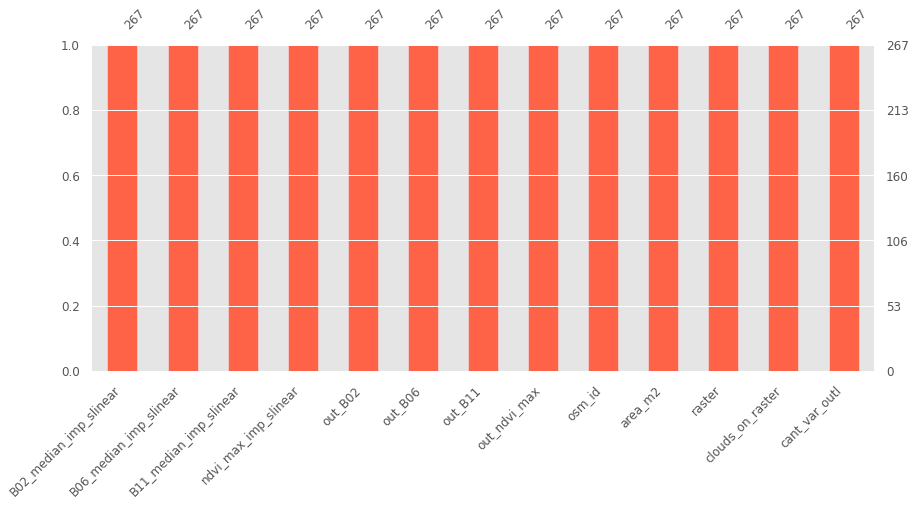

In [ ]:
msno.bar(df_interest_extra3_,figsize=(14,6), sort="ascending",fontsize=12, color='tomato') 

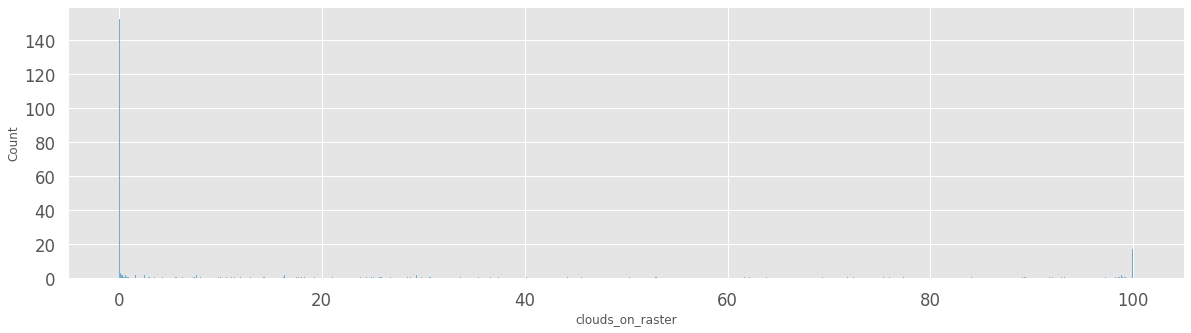

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.histplot(data=df_interest_extra3_['clouds_on_raster'],binwidth=0.1)

In [ ]:
##Filtrar por nubosidad < 10%
df_interest_extra4=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<10]
len(df_interest_extra4)

183

In [ ]:
df_interest_extra5=df_interest_extra3_[df_interest_extra3_['clouds_on_raster']<40]
len(df_interest_extra5)
df_interest_extra5.columns

Index(['B02_median_imp_slinear', 'B06_median_imp_slinear',
       'B11_median_imp_slinear', 'ndvi_max_imp_slinear', 'out_B02', 'out_B06',
       'out_B11', 'out_ndvi_max', 'osm_id', 'area_m2', 'raster',
       'clouds_on_raster', 'cant_var_outl'],
      dtype='object')

In [ ]:
###Normalización de las variables bajo análisis en el rango 0,1
###################
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df_interest_extra4[['B02_median_imp_slinear_scl','B06_median_imp_slinear_scl',
                              'B11_median_imp_slinear_scl',
                              'ndvi_max_imp_slinear_scl',
                               'clouds_on_raster_scl']] = scaler.fit_transform(df_interest_extra4[['B02_median_imp_slinear',
                              'B06_median_imp_slinear',
                              'B11_median_imp_slinear',
                              'ndvi_max_imp_slinear',
                               'clouds_on_raster']])
df_interest_extra4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,B02_median_imp_slinear,B06_median_imp_slinear,B11_median_imp_slinear,ndvi_max_imp_slinear,out_B02,out_B06,out_B11,out_ndvi_max,osm_id,area_m2,raster,clouds_on_raster,cant_var_outl,B02_median_imp_slinear_scl,B06_median_imp_slinear_scl,B11_median_imp_slinear_scl,ndvi_max_imp_slinear_scl,clouds_on_raster_scl
date,,,,,,,,,,,,,,,,,,
2017-01-03,0.0987,0.2118,0.1866,0.790476,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0.098814,0.722702,0.476448,0.946110,0.0
2017-02-12,0.0920,0.2110,0.1654,0.809364,1,1,0,1,6170329,859608.565917,S2A_MSIL1C_20170212T142031_N0204_R010_T20JLL_2...,0.0,3,0.010540,0.716418,0.361668,1.000000,0.0
2017-02-22,0.0912,0.2101,0.1673,0.803294,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170222T142031_N0204_R010_T20JLL_2...,0.0,0,0.000000,0.709348,0.371954,0.982680,0.0
2017-03-14,0.0979,0.2043,0.1813,0.782493,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170314T142031_N0204_R010_T20JLL_2...,0.0,0,0.088274,0.663786,0.447753,0.923333,0.0
2017-06-02,0.1077,0.1691,0.1588,0.675599,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20170602T142041_N0205_R010_T20JLL_2...,0.0,0,0.217391,0.387274,0.325934,0.618341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16,0.1115,0.2074,0.1908,0.736237,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220216T141741_N0400_R010_T20JLL_2...,0.0,0,0.267457,0.688138,0.499188,0.791353,0.0
2022-03-23,0.1124,0.2044,0.1817,0.743007,0,0,0,0,6170329,859608.565917,S2B_MSIL1C_20220323T141739_N0400_R010_T20JLL_2...,0.0,0,0.279315,0.664572,0.449919,0.810669,0.0
2022-03-28,0.1026,0.2048,0.1825,0.756883,0,0,0,0,6170329,859608.565917,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,0,0.150198,0.667714,0.454250,0.850262,0.0


In [ ]:
## se guarda el archivo con los datos imputados bajo interpolación slinear, 
#identificación de outliers a partir del análisis del ruido 
#y normalización con MaxminScaler y por último filtrado por nubosidad menor a 10%
from pathlib import Path  
#filepath = Path('Resultado_tp1/DF.csv') 
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/Resultado_serie_tiempo_parque_sarmiento.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_interest_extra4.to_csv(filepath) 

In [ ]:
##Como se mencionó previamente, la estructura de datos del dataset se asemeja a un panel de datos
##En esta segunda parte vamos a reformular el dataset como datos de panel 
##donde el dataset tiene dos índices, la fecha a lo largo y el código osm_id hacia lo ancho.

In [ ]:
##al dataset se lo transforma en datos de panel con formato wide
df_paneldata = df_interest_A1.pivot_table(values=['B02_median','B06_median','B11_median','clouds_on_raster','area_m2','ndvi_max'],
                                index='date',
                                columns=['osm_id','name'])
df_paneldata.head()



B02_median                                               \
osm_id            6170329                    6747400           7319079     
name       Parque Sarmiento Plaza Eduardo Cammisa Teco Parque de la Vida   
date                                                                       
2017-01-03           0.0987                     0.0922            0.0998   
2017-01-13           0.2580                        NaN               NaN   
2017-01-23              NaN                        NaN            0.1029   
2017-02-12           0.0920                     0.0854            0.0911   
2017-02-22           0.0912                     0.0879            0.0894   

                                                                 \
osm_id                             7322563            9319594     
name       Reserva Natural Parque San Martín Parque del Chateau   
date                                                              
2017-01-03                            0.0834             0.0801   
2017-01-13                               NaN                NaN   
2017-01-23                               NaN                NaN   
2017-02-12                            0.0783             0.0749   
2017-02-22                            0.0797             0.0768   

                                                                           \
osm_id                 23300957         25622122                25925819    
name       Plaza de las Américas Plaza San Martín Plaza de la Intendencia   
date                                                                        
2017-01-03                0.1136          0.12785                  0.0985   
2017-01-13                   NaN          0.25395                     NaN   
2017-01-23                   NaN              NaN                     NaN   
2017-02-12                0.1068          0.11420                  0.1242   
2017-02-22                0.1071          0.11240                  0.1259   

                                          ...                    ndvi_max  \
osm_id        25925923         25926534   ...                   737514377   
name       Plaza Italia Paseo Sobremonte  ... Plaza Doctor Ruben A. Marti   
date                                      ...                               
2017-01-03       0.1096          0.10235  ...                    0.610778   
2017-01-13          NaN              NaN  ...                         NaN   
2017-01-23          NaN              NaN  ...                         NaN   
2017-02-12       0.0939          0.09590  ...                    0.659411   
2017-02-22       0.0928          0.09630  ...                    0.631692   

                                                                        \
osm_id     737729683                      751430168          755698779   
name           Plaza Nuevo Parque de la Legislatura Plaza San Fernando   
date                                                                     
2017-01-03  0.640319                       0.474636           0.655978   
2017-01-13       NaN                       0.232200                NaN   
2017-01-23       NaN                            NaN           0.633023   
2017-02-12  0.616304                       0.474203           0.704132   
2017-02-22  0.700792                       0.586508           0.639225   

                                                                              \
osm_id              755698781          755698782                   756344848   
name       Paseo San Fernando Paseo San Fernando Parque Ciudad Universitaria   
date                                                                           
2017-01-03           0.666743           0.613663                    0.740741   
2017-01-13                NaN                NaN                         NaN   
2017-01-23           0.623649           0.553918                         NaN   
2017-02-12           0.671739           0.648773                    0.759641   
2017-02-22           0.654179    

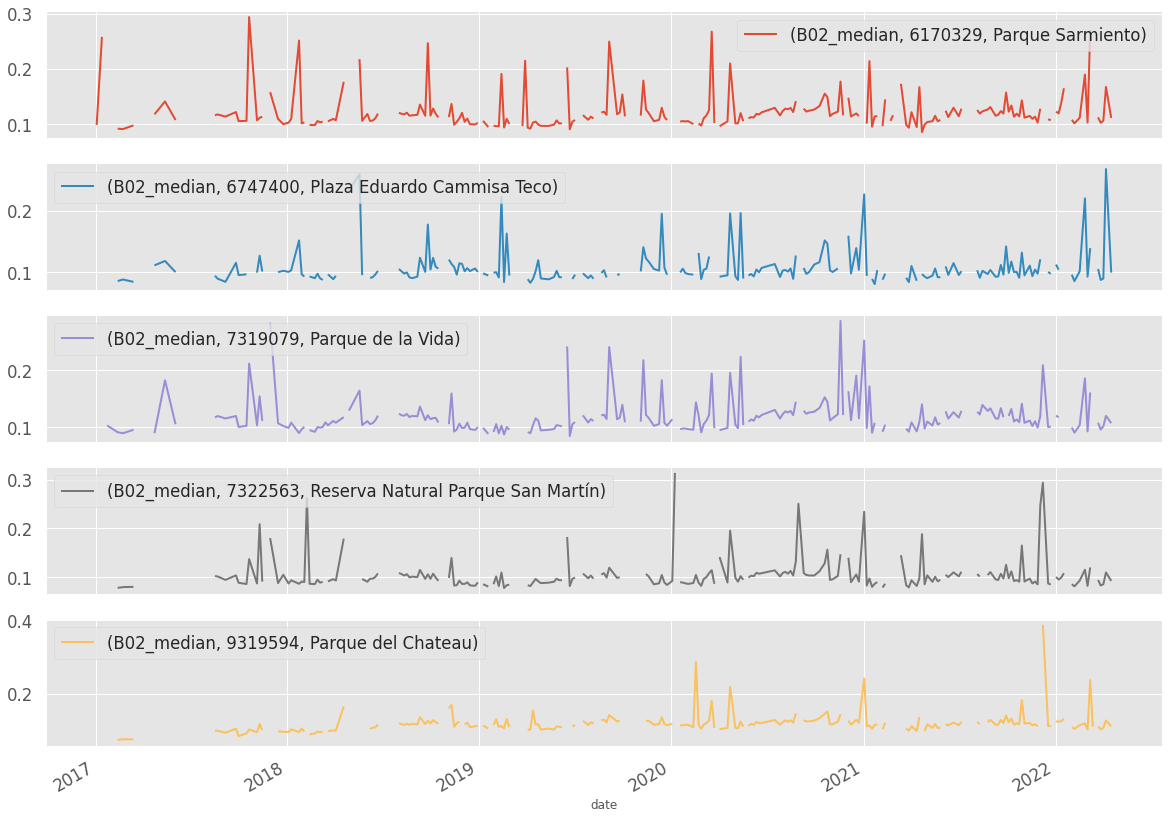

In [ ]:
##A continuación se presenta los gráficos de ejemplo de la variable B02_median para las primeras 10 osm_id (espacios verdes) a lo largo del tiempo
import matplotlib.pyplot as plt
df_paneldata.iloc[:,:5].plot(subplots=True, figsize=(20,15))
plt.show()

Para continuar con la curación de datos con datos de panel habría que analizar y definir el tipo de panel con el que estamos trabajando, si es un modelo de efectos fijos o aleatorios.

Al identificar los outliers habría que analizar qué tipo de outlier es y si afectan al modelo predictivo a utilizar.